C:\Users\Storm\AppData\Local\Temp/ipykernel_10996/555115150.py:33: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)
C:\Users\Storm\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Random Forest Model:
Train RMSE: 16.43
Test RMSE: 13.57
Train MAE: 11.53
Test MAE: 11.32
Train SMAPE: 23.70
Test SMAPE: 129.44
Train R2: 0.94
Test R2: -0.26

Voting Ensemble Model:
Train RMSE: 16.36
Test RMSE: 13.57
Train MAE: 11.47
Test MAE: 11.36
Train SMAPE: 23.60
Test SMAPE: 129.86
Train R2: 0.94
Test R2: -0.25



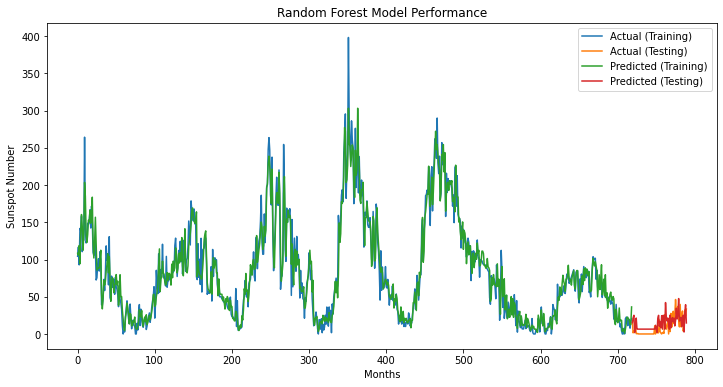

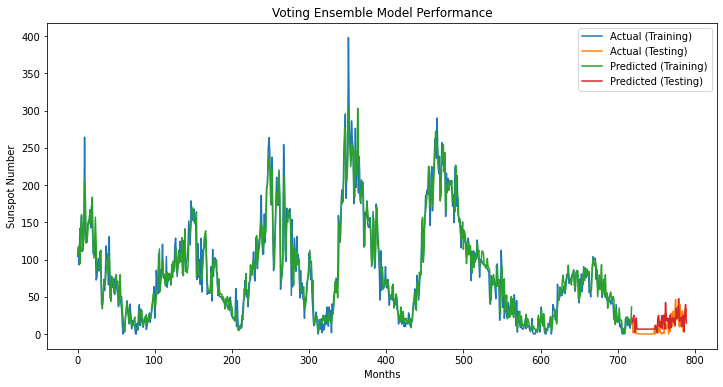

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor, VotingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import MinMaxScaler

# Load the data
data = pd.read_csv('C:/Users/Storm/Downloads/SN_m_tot_V2.0.csv', delimiter=';', header=None)
data.columns = ['Year', 'Month', 'Date', 'Monthly Mean Total Sunspot Number', 'Uncertainty', 'Observations', 'Definitive/Provisional']

# Select the 'Monthly Mean Total Sunspot Number' column as the target variable
target = data['Monthly Mean Total Sunspot Number'].values.reshape(-1, 1)

# Normalize the target variable
scaler = MinMaxScaler(feature_range=(0, 1))
target_scaled = scaler.fit_transform(target)

# Split the data into training and testing sets
train_size = 720  # Number of months for training
test_size = 72  # Number of months for testing

train_data = target_scaled[:train_size]
test_data = target_scaled[train_size:train_size+test_size]

# Train and evaluate the Random Forest model
def train_evaluate_model(train_data, test_data):
    X_train, y_train = train_data[:-1], train_data[1:]
    X_test, y_test = test_data[:-1], test_data[1:]

    # Train the Random Forest model
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)

    # Make predictions
    train_predictions = model.predict(X_train)
    test_predictions = model.predict(X_test)

    # Invert the scaling
    train_predictions = scaler.inverse_transform(train_predictions.reshape(-1, 1))
    y_train = scaler.inverse_transform(y_train.reshape(-1, 1))  # Reshape y_train
    test_predictions = scaler.inverse_transform(test_predictions.reshape(-1, 1))
    y_test = scaler.inverse_transform(y_test.reshape(-1, 1))  # Reshape y_test

    # Calculate RMSE
    train_rmse = np.sqrt(mean_squared_error(y_train, train_predictions))
    test_rmse = np.sqrt(mean_squared_error(y_test, test_predictions))

    # Calculate MAE
    train_mae = mean_absolute_error(y_train, train_predictions)
    test_mae = mean_absolute_error(y_test, test_predictions)

    # Calculate SMAPE
    train_smape = np.mean(np.abs((y_train - train_predictions) / ((y_train + train_predictions) / 2))) * 100
    test_smape = np.mean(np.abs((y_test - test_predictions) / ((y_test + test_predictions) / 2))) * 100

    # Calculate R2
    train_r2 = r2_score(y_train, train_predictions)
    test_r2 = r2_score(y_test, test_predictions)

    return train_rmse, test_rmse, train_mae, test_mae, train_smape, test_smape, train_r2, test_r2, y_train, train_predictions, y_test, test_predictions

# Train and evaluate the Voting ensemble model
def train_evaluate_voting_model(train_data, test_data):
    X_train, y_train = train_data[:-1], train_data[1:]
    X_test, y_test = test_data[:-1], test_data[1:]

    # Create individual models
    model1 = RandomForestRegressor(n_estimators=100, random_state=42)
    model2 = RandomForestRegressor(n_estimators=200, random_state=42)
    model3 = RandomForestRegressor(n_estimators=300, random_state=42)

    # Create the Voting ensemble model
    model = VotingRegressor([('model1', model1), ('model2', model2), ('model3', model3)])

    # Train the Voting ensemble model
    model.fit(X_train, y_train)

    # Make predictions
    train_predictions = model.predict(X_train)
    test_predictions = model.predict(X_test)

    # Invert the scaling
    train_predictions = scaler.inverse_transform(train_predictions.reshape(-1, 1))
    y_train = scaler.inverse_transform(y_train.reshape(-1, 1))
    test_predictions = scaler.inverse_transform(test_predictions.reshape(-1, 1))
    y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

    # Calculate RMSE
    train_rmse = np.sqrt(mean_squared_error(y_train, train_predictions))
    test_rmse = np.sqrt(mean_squared_error(y_test, test_predictions))

    # Calculate MAE
    train_mae = mean_absolute_error(y_train, train_predictions)
    test_mae = mean_absolute_error(y_test, test_predictions)

    # Calculate SMAPE
    train_smape = np.mean(np.abs((y_train - train_predictions) / ((y_train + train_predictions) / 2))) * 100
    test_smape = np.mean(np.abs((y_test - test_predictions) / ((y_test + test_predictions) / 2))) * 100

    # Calculate R2
    train_r2 = r2_score(y_train, train_predictions)
    test_r2 = r2_score(y_test, test_predictions)

    return train_rmse, test_rmse, train_mae, test_mae, train_smape, test_smape, train_r2, test_r2, y_train, train_predictions, y_test, test_predictions

# Train and evaluate the Random Forest model
train_rmse, test_rmse, train_mae, test_mae, train_smape, test_smape, train_r2, test_r2, y_train, train_predictions, y_test, test_predictions = train_evaluate_model(train_data, test_data)

# Print the results for the Random Forest model
print("Random Forest Model:")
print(f"Train RMSE: {train_rmse:.2f}")
print(f"Test RMSE: {test_rmse:.2f}")
print(f"Train MAE: {train_mae:.2f}")
print(f"Test MAE: {test_mae:.2f}")
print(f"Train SMAPE: {train_smape:.2f}")
print(f"Test SMAPE: {test_smape:.2f}")
print(f"Train R2: {train_r2:.2f}")
print(f"Test R2: {test_r2:.2f}")
print()

# Save the forecasted data for the Random Forest model
forecast_data = np.concatenate((train_predictions, test_predictions))
forecast_data = scaler.inverse_transform(forecast_data.reshape(-1, 1))
np.savetxt('forecast_data_rf.csv', forecast_data, delimiter=',')

# Train and evaluate the Voting ensemble model
train_rmse, test_rmse, train_mae, test_mae, train_smape, test_smape, train_r2, test_r2, y_train, train_predictions, y_test, test_predictions = train_evaluate_voting_model(train_data, test_data)

# Print the results for the Voting ensemble model
print("Voting Ensemble Model:")
print(f"Train RMSE: {train_rmse:.2f}")
print(f"Test RMSE: {test_rmse:.2f}")
print(f"Train MAE: {train_mae:.2f}")
print(f"Test MAE: {test_mae:.2f}")
print(f"Train SMAPE: {train_smape:.2f}")
print(f"Test SMAPE: {test_smape:.2f}")
print(f"Train R2: {train_r2:.2f}")
print(f"Test R2: {test_r2:.2f}")
print()

# Save the forecasted data for the Voting ensemble model
voting_forecast_data = np.concatenate((train_predictions, test_predictions))
voting_forecast_data = scaler.inverse_transform(voting_forecast_data.reshape(-1, 1))
np.savetxt('forecast_data_voting.csv', voting_forecast_data, delimiter=',')

# Plot the predictions for the Random Forest model
plt.figure(figsize=(12, 6))
plt.plot(range(len(y_train)), y_train, label='Actual (Training)')
plt.plot(range(len(y_train), len(y_train) + len(y_test)), y_test, label='Actual (Testing)')
plt.plot(range(len(y_train)), train_predictions, label='Predicted (Training)')
plt.plot(range(len(y_train), len(y_train) + len(y_test)), test_predictions, label='Predicted (Testing)')
plt.title('Random Forest Model Performance')
plt.xlabel('Months')
plt.ylabel('Sunspot Number')
plt.legend()
plt.show()

# Plot the predictions for the Voting ensemble model
plt.figure(figsize=(12, 6))
plt.plot(range(len(y_train)), y_train, label='Actual (Training)')
plt.plot(range(len(y_train), len(y_train) + len(y_test)), y_test, label='Actual (Testing)')
plt.plot(range(len(y_train)), train_predictions, label='Predicted (Training)')
plt.plot(range(len(y_train), len(y_train) + len(y_test)), test_predictions, label='Predicted (Testing)')
plt.title('Voting Ensemble Model Performance')
plt.xlabel('Months')
plt.ylabel('Sunspot Number')
plt.legend()
plt.show()


C:\Users\Storm\AppData\Local\Temp/ipykernel_10996/1277190361.py:33: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)
C:\Users\Storm\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Random Forest Model:
Train RMSE: 16.43
Test RMSE: 13.57
Train MAE: 11.53
Test MAE: 11.32
Train SMAPE: 23.70
Test SMAPE: 129.44
Train R2: 0.94
Test R2: -0.26

Voting Ensemble Model:
Train RMSE: 16.36
Test RMSE: 13.57
Train MAE: 11.47
Test MAE: 11.36
Train SMAPE: 23.60
Test SMAPE: 129.86
Train R2: 0.94
Test R2: -0.25



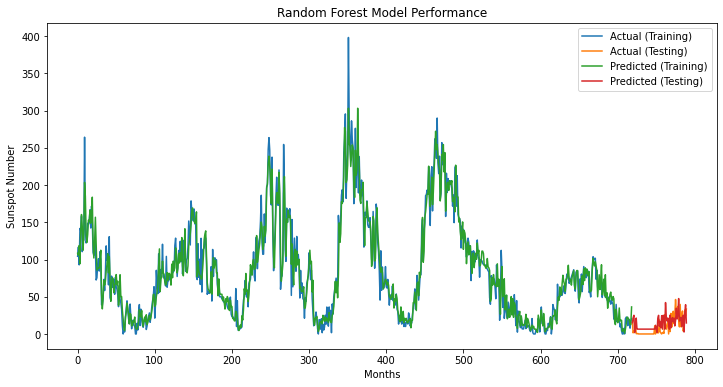

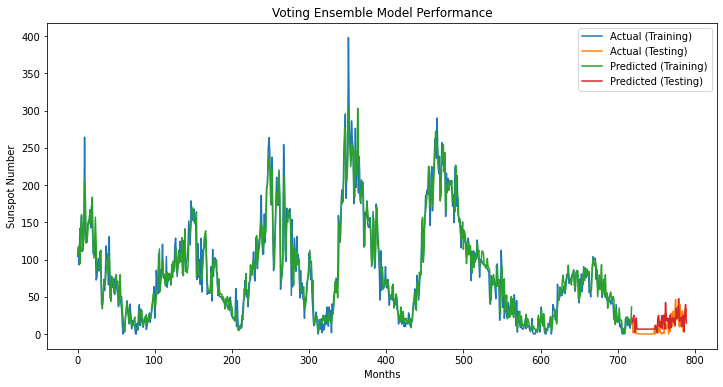

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor, VotingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import MinMaxScaler

# Load the data
data = pd.read_csv('C:/Users/Storm/Downloads/SN_m_tot_V2.0.csv', delimiter=';', header=None)
data.columns = ['Year', 'Month', 'Date', 'Monthly Mean Total Sunspot Number', 'Uncertainty', 'Observations', 'Definitive/Provisional']

# Select the 'Monthly Mean Total Sunspot Number' column as the target variable
target = data['Monthly Mean Total Sunspot Number'].values.reshape(-1, 1)

# Normalize the target variable
scaler = MinMaxScaler(feature_range=(0, 1))
target_scaled = scaler.fit_transform(target)

# Split the data into training and testing sets
train_size = 720  # Number of months for training
test_size = 72  # Number of months for testing

train_data = target_scaled[:train_size]
test_data = target_scaled[train_size:train_size+test_size]

# Train and evaluate the Random Forest model
def train_evaluate_model(train_data, test_data):
    X_train, y_train = train_data[:-1], train_data[1:]
    X_test, y_test = test_data[:-1], test_data[1:]

    # Train the Random Forest model
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)

    # Make predictions
    train_predictions = model.predict(X_train)
    test_predictions = model.predict(X_test)

    # Invert the scaling
    train_predictions = scaler.inverse_transform(train_predictions.reshape(-1, 1))
    y_train = scaler.inverse_transform(y_train.reshape(-1, 1))  # Reshape y_train
    test_predictions = scaler.inverse_transform(test_predictions.reshape(-1, 1))
    y_test = scaler.inverse_transform(y_test.reshape(-1, 1))  # Reshape y_test

    # Calculate RMSE
    train_rmse = np.sqrt(mean_squared_error(y_train, train_predictions))
    test_rmse = np.sqrt(mean_squared_error(y_test, test_predictions))

    # Calculate MAE
    train_mae = mean_absolute_error(y_train, train_predictions)
    test_mae = mean_absolute_error(y_test, test_predictions)

    # Calculate SMAPE
    train_smape = np.mean(np.abs((y_train - train_predictions) / ((y_train + train_predictions) / 2))) * 100
    test_smape = np.mean(np.abs((y_test - test_predictions) / ((y_test + test_predictions) / 2))) * 100

    # Calculate R2
    train_r2 = r2_score(y_train, train_predictions)
    test_r2 = r2_score(y_test, test_predictions)

    return train_rmse, test_rmse, train_mae, test_mae, train_smape, test_smape, train_r2, test_r2, y_train, train_predictions, y_test, test_predictions

# Train and evaluate the Voting ensemble model
def train_evaluate_voting_model(train_data, test_data):
    X_train, y_train = train_data[:-1], train_data[1:]
    X_test, y_test = test_data[:-1], test_data[1:]

    # Train the individual Random Forest models
    model1 = RandomForestRegressor(n_estimators=100, random_state=42)
    model2 = RandomForestRegressor(n_estimators=200, random_state=42)
    model3 = RandomForestRegressor(n_estimators=300, random_state=42)

    # Create the Voting ensemble model
    model = VotingRegressor([('model1', model1), ('model2', model2), ('model3', model3)])

    # Train the Voting ensemble model
    model.fit(X_train, y_train)

    # Make predictions
    train_predictions = model.predict(X_train)
    test_predictions = model.predict(X_test)

    # Invert the scaling
    train_predictions = scaler.inverse_transform(train_predictions.reshape(-1, 1))
    y_train = scaler.inverse_transform(y_train.reshape(-1, 1))
    test_predictions = scaler.inverse_transform(test_predictions.reshape(-1, 1))
    y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

    # Calculate RMSE
    train_rmse = np.sqrt(mean_squared_error(y_train, train_predictions))
    test_rmse = np.sqrt(mean_squared_error(y_test, test_predictions))

    # Calculate MAE
    train_mae = mean_absolute_error(y_train, train_predictions)
    test_mae = mean_absolute_error(y_test, test_predictions)

    # Calculate SMAPE
    train_smape = np.mean(np.abs((y_train - train_predictions) / ((y_train + train_predictions) / 2))) * 100
    test_smape = np.mean(np.abs((y_test - test_predictions) / ((y_test + test_predictions) / 2))) * 100

    # Calculate R2
    train_r2 = r2_score(y_train, train_predictions)
    test_r2 = r2_score(y_test, test_predictions)

    return train_rmse, test_rmse, train_mae, test_mae, train_smape, test_smape, train_r2, test_r2, y_train, train_predictions, y_test, test_predictions

# Train and evaluate the Random Forest model
train_rmse, test_rmse, train_mae, test_mae, train_smape, test_smape, train_r2, test_r2, y_train, train_predictions, y_test, test_predictions = train_evaluate_model(train_data, test_data)

# Print the results for the Random Forest model
print("Random Forest Model:")
print(f"Train RMSE: {train_rmse:.2f}")
print(f"Test RMSE: {test_rmse:.2f}")
print(f"Train MAE: {train_mae:.2f}")
print(f"Test MAE: {test_mae:.2f}")
print(f"Train SMAPE: {train_smape:.2f}")
print(f"Test SMAPE: {test_smape:.2f}")
print(f"Train R2: {train_r2:.2f}")
print(f"Test R2: {test_r2:.2f}")
print()

# Save the forecasted data for the Random Forest model
forecast_data = np.concatenate((train_predictions, test_predictions))
forecast_data = scaler.inverse_transform(forecast_data.reshape(-1, 1))
np.savetxt('forecast_data_rf.csv', forecast_data, delimiter=',')

# Train and evaluate the Voting ensemble model
train_rmse, test_rmse, train_mae, test_mae, train_smape, test_smape, train_r2, test_r2, y_train, train_predictions, y_test, test_predictions = train_evaluate_voting_model(train_data, test_data)

# Print the results for the Voting ensemble model
print("Voting Ensemble Model:")
print(f"Train RMSE: {train_rmse:.2f}")
print(f"Test RMSE: {test_rmse:.2f}")
print(f"Train MAE: {train_mae:.2f}")
print(f"Test MAE: {test_mae:.2f}")
print(f"Train SMAPE: {train_smape:.2f}")
print(f"Test SMAPE: {test_smape:.2f}")
print(f"Train R2: {train_r2:.2f}")
print(f"Test R2: {test_r2:.2f}")
print()

# Save the forecasted data for the Voting ensemble model
forecast_data_voting = np.concatenate((train_predictions, test_predictions))
forecast_data_voting = scaler.inverse_transform(forecast_data_voting.reshape(-1, 1))
np.savetxt('forecast_data_voting.csv', forecast_data_voting, delimiter=',')

# Plot the predictions for the Random Forest model
plt.figure(figsize=(12, 6))
plt.plot(range(len(y_train)), y_train, label='Actual (Training)')
plt.plot(range(len(y_train), len(y_train) + len(y_test)), y_test, label='Actual (Testing)')
plt.plot(range(len(y_train)), train_predictions, label='Predicted (Training)')
plt.plot(range(len(y_train), len(y_train) + len(y_test)), test_predictions, label='Predicted (Testing)')
plt.title('Random Forest Model Performance')
plt.xlabel('Months')
plt.ylabel('Sunspot Number')
plt.legend()
plt.show()

# Plot the predictions for the Voting ensemble model
plt.figure(figsize=(12, 6))
plt.plot(range(len(y_train)), y_train, label='Actual (Training)')
plt.plot(range(len(y_train), len(y_train) + len(y_test)), y_test, label='Actual (Testing)')
plt.plot(range(len(y_train)), train_predictions, label='Predicted (Training)')
plt.plot(range(len(y_train), len(y_train) + len(y_test)), test_predictions, label='Predicted (Testing)')
plt.title('Voting Ensemble Model Performance')
plt.xlabel('Months')
plt.ylabel('Sunspot Number')
plt.legend()
plt.show()


C:\Users\Storm\AppData\Local\Temp/ipykernel_10996/3042231605.py:33: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)
C:\Users\Storm\AppData\Local\Temp/ipykernel_10996/3042231605.py:59: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)
C:\Users\Storm\AppData\Local\Temp/ipykernel_10996/3042231605.py:59: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)
C:\Users\Storm\AppData\Local\Temp/ipykernel_10996/3042231605.py:59: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_trai

Random Forest Model:
Test RMSE: 13.57

Voting Ensemble Model:
Test RMSE: 13.57



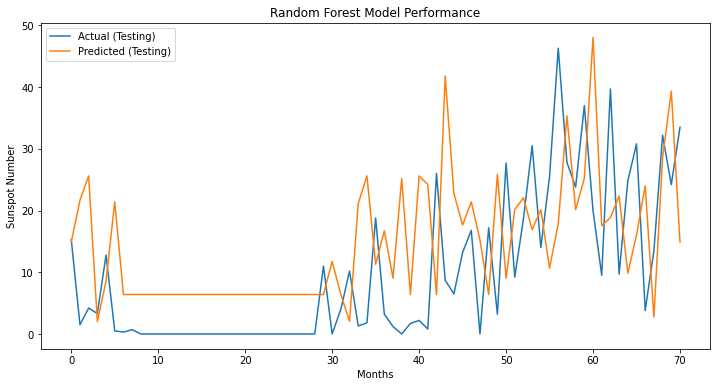

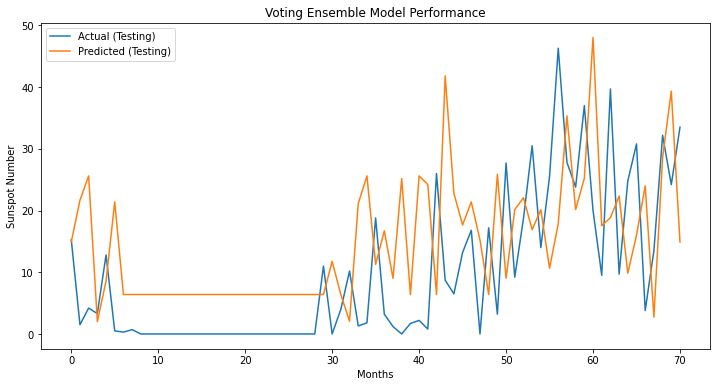

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor, VotingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import MinMaxScaler

# Load the data
data = pd.read_csv('C:/Users/Storm/Downloads/SN_m_tot_V2.0.csv', delimiter=';', header=None)
data.columns = ['Year', 'Month', 'Date', 'Monthly Mean Total Sunspot Number', 'Uncertainty', 'Observations', 'Definitive/Provisional']

# Select the 'Monthly Mean Total Sunspot Number' column as the target variable
target = data['Monthly Mean Total Sunspot Number'].values.reshape(-1, 1)

# Normalize the target variable
scaler = MinMaxScaler(feature_range=(0, 1))
target_scaled = scaler.fit_transform(target)

# Split the data into training and testing sets
train_size = 720  # Number of months for training
test_size = 72  # Number of months for testing

train_data = target_scaled[:train_size]
test_data = target_scaled[train_size:train_size+test_size]

# Train and evaluate the Random Forest model
def train_evaluate_model(train_data, test_data):
    X_train, y_train = train_data[:-1], train_data[1:]
    X_test, y_test = test_data[:-1], test_data[1:]

    # Train the Random Forest model
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)

    # Make predictions
    train_predictions = model.predict(X_train)
    test_predictions = model.predict(X_test)

    # Invert the scaling
    train_predictions = scaler.inverse_transform(train_predictions.reshape(-1, 1))
    y_train = scaler.inverse_transform(y_train.reshape(-1, 1))  # Reshape y_train
    test_predictions = scaler.inverse_transform(test_predictions.reshape(-1, 1))
    y_test = scaler.inverse_transform(y_test.reshape(-1, 1))  # Reshape y_test

    # Calculate RMSE
    rmse = np.sqrt(mean_squared_error(y_test, test_predictions))

    return rmse, y_test, test_predictions

# Train and evaluate the Voting ensemble model
def train_evaluate_voting_model(train_data, test_data):
    X_train, y_train = train_data[:-1], train_data[1:]
    X_test, y_test = test_data[:-1], test_data[1:]

    # Train individual models
    models = []
    for _ in range(3):
        model = RandomForestRegressor(n_estimators=100, random_state=42)
        model.fit(X_train, y_train)
        models.append(model)

    # Make predictions
    test_predictions = np.mean([model.predict(X_test) for model in models], axis=0)

    # Invert the scaling
    test_predictions = scaler.inverse_transform(test_predictions.reshape(-1, 1))
    y_test = scaler.inverse_transform(y_test.reshape(-1, 1))  # Reshape y_test

    # Calculate RMSE
    rmse = np.sqrt(mean_squared_error(y_test, test_predictions))

    return rmse, y_test, test_predictions

# Train and evaluate the Random Forest model
rf_rmse, rf_y_test, rf_test_predictions = train_evaluate_model(train_data, test_data)

# Train and evaluate the Voting ensemble model
voting_rmse, voting_y_test, voting_test_predictions = train_evaluate_voting_model(train_data, test_data)

# Print the results
print("Random Forest Model:")
print(f"Test RMSE: {rf_rmse:.2f}")
print()

print("Voting Ensemble Model:")
print(f"Test RMSE: {voting_rmse:.2f}")
print()

# Plot the predictions for the Random Forest model
plt.figure(figsize=(12, 6))
plt.plot(range(len(rf_y_test)), rf_y_test, label='Actual (Testing)')
plt.plot(range(len(rf_y_test)), rf_test_predictions, label='Predicted (Testing)')
plt.title('Random Forest Model Performance')
plt.xlabel('Months')
plt.ylabel('Sunspot Number')
plt.legend()
plt.show()

# Plot the predictions for the Voting ensemble model
plt.figure(figsize=(12, 6))
plt.plot(range(len(voting_y_test)), voting_y_test, label='Actual (Testing)')
plt.plot(range(len(voting_y_test)), voting_test_predictions, label='Predicted (Testing)')
plt.title('Voting Ensemble Model Performance')
plt.xlabel('Months')
plt.ylabel('Sunspot Number')
plt.legend()
plt.show()


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import AdaBoostRegressor, RandomForestRegressor
from sklearn.linear_model import LinearRegression
from keras.models import Sequential
from keras.layers import LSTM, Dense, Bidirectional

# Load the data
data = pd.read_csv('C:/Users/Storm/Downloads/SN_m_tot_V2.0.csv', delimiter=';', header=None)
data.columns = ['Year', 'Month', 'Date', 'Monthly Mean Total Sunspot Number', 'Uncertainty', 'Observations', 'Definitive/Provisional']

# Select the 'Monthly Mean Total Sunspot Number' column as the target variable
target = data['Monthly Mean Total Sunspot Number'].values.reshape(-1, 1)

# Normalize the target variable
scaler = MinMaxScaler(feature_range=(0, 1))
target_scaled = scaler.fit_transform(target)

# Split the data into training and testing sets
train_size = 720  # Number of months for training
test_size = 72  # Number of months for testing

train_data = target_scaled[:train_size]
test_data = target_scaled[train_size:train_size+test_size]

# Create Bidirectional LSTM model
def create_bidirectional_lstm_model(units):
    model = Sequential()
    model.add(Bidirectional(LSTM(units, input_shape=(12, 1))))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

# Train and evaluate the Bidirectional LSTM model
def train_evaluate_lstm_model(model, train_data, test_data):
    X_train, y_train = create_sequences(train_data, 12)
    X_test, y_test = create_sequences(test_data, 12)

    model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=0)

    # Make predictions
    train_predictions = model.predict(X_train)
    test_predictions = model.predict(X_test)

    # Invert the scaling
    train_predictions = scaler.inverse_transform(train_predictions)
    y_train = scaler.inverse_transform(y_train.reshape(-1, 1))  # Reshape y_train
    test_predictions = scaler.inverse_transform(test_predictions)
    y_test = scaler.inverse_transform(y_test.reshape(-1, 1))  # Reshape y_test

    # Calculate RMSE
    train_rmse = np.sqrt(mean_squared_error(y_train, train_predictions))
    test_rmse = np.sqrt(mean_squared_error(y_test, test_predictions))

    return train_rmse, test_rmse, y_train, train_predictions, y_test, test_predictions

# Train and evaluate the AdaBoost model
def train_evaluate_adaboost_model(train_data, test_data):
    X_train, y_train = train_data[:-1], train_data[1:]
    X_test, y_test = test_data[:-1], test_data[1:]

    # Train the AdaBoost model
    base_estimator = DecisionTreeRegressor(max_depth=4)  # Base estimator
    model = AdaBoostRegressor(base_estimator=base_estimator, n_estimators=100, random_state=42)
    model.fit(X_train, y_train)

    # Make predictions
    train_predictions = model.predict(X_train)
    test_predictions = model.predict(X_test)

    # Invert the scaling
    train_predictions = scaler.inverse_transform(train_predictions.reshape(-1, 1))
    y_train = scaler.inverse_transform(y_train.reshape(-1, 1))  # Reshape y_train
    test_predictions = scaler.inverse_transform(test_predictions.reshape(-1, 1))
    y_test = scaler.inverse_transform(y_test.reshape(-1, 1))  # Reshape y_test

    # Calculate RMSE
    train_rmse = np.sqrt(mean_squared_error(y_train, train_predictions))
    test_rmse = np.sqrt(mean_squared_error(y_test, test_predictions))

    return train_rmse, test_rmse, y_train, train_predictions, y_test, test_predictions

# Train and evaluate the Random Forest model
def train_evaluate_rf_model(train_data, test_data):
    X_train, y_train = train_data[:-1], train_data[1:]
    X_test, y_test = test_data[:-1], test_data[1:]

    # Train the Random Forest model
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)

    # Make predictions
    train_predictions = model.predict(X_train)
    test_predictions = model.predict(X_test)

    # Invert the scaling
    train_predictions = scaler.inverse_transform(train_predictions.reshape(-1, 1))
    y_train = scaler.inverse_transform(y_train.reshape(-1, 1))  # Reshape y_train
    test_predictions = scaler.inverse_transform(test_predictions.reshape(-1, 1))
    y_test = scaler.inverse_transform(y_test.reshape(-1, 1))  # Reshape y_test

    # Calculate RMSE
    train_rmse = np.sqrt(mean_squared_error(y_train, train_predictions))
    test_rmse = np.sqrt(mean_squared_error(y_test, test_predictions))

    return train_rmse, test_rmse, y_train, train_predictions, y_test, test_predictions

# Train and evaluate the Linear Regression model
def train_evaluate_lr_model(train_data, test_data):
    X_train, y_train = train_data[:-1], train_data[1:]
    X_test, y_test = test_data[:-1], test_data[1:]

    # Train the Linear Regression model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Make predictions
    train_predictions = model.predict(X_train)
    test_predictions = model.predict(X_test)

    # Invert the scaling
    train_predictions = scaler.inverse_transform(train_predictions.reshape(-1, 1))
    y_train = scaler.inverse_transform(y_train.reshape(-1, 1))  # Reshape y_train
    test_predictions = scaler.inverse_transform(test_predictions.reshape(-1, 1))
    y_test = scaler.inverse_transform(y_test.reshape(-1, 1))  # Reshape y_test

    # Calculate RMSE
    train_rmse = np.sqrt(mean_squared_error(y_train, train_predictions))
    test_rmse = np.sqrt(mean_squared_error(y_test, test_predictions))

    return train_rmse, test_rmse, y_train, train_predictions, y_test, test_predictions

# Set the hyperparameters
hidden_units = [19]
time_intervals = 792

results = []

# Perform the comparative study
for units in hidden_units:
    # Bidirectional LSTM
    lstm_model = create_bidirectional_lstm_model(units)
    lstm_train_rmse, lstm_test_rmse, lstm_y_train, lstm_train_predictions, lstm_y_test, lstm_test_predictions = train_evaluate_lstm_model(lstm_model, train_data, test_data)

    # AdaBoost
    adaboost_train_rmse, adaboost_test_rmse, adaboost_y_train, adaboost_train_predictions, adaboost_y_test, adaboost_test_predictions = train_evaluate_adaboost_model(train_data, test_data)

    # Random Forest
    rf_train_rmse, rf_test_rmse, rf_y_train, rf_train_predictions, rf_y_test, rf_test_predictions = train_evaluate_rf_model(train_data, test_data)

    # Linear Regression
    lr_train_rmse, lr_test_rmse, lr_y_train, lr_train_predictions, lr_y_test, lr_test_predictions = train_evaluate_lr_model(train_data, test_data)

    results.append((
        units,
        lstm_train_rmse, lstm_test_rmse, lstm_y_train, lstm_train_predictions, lstm_y_test, lstm_test_predictions,
        adaboost_train_rmse, adaboost_test_rmse, adaboost_y_train, adaboost_train_predictions, adaboost_y_test, adaboost_test_predictions,
        rf_train_rmse, rf_test_rmse, rf_y_train, rf_train_predictions, rf_y_test, rf_test_predictions,
        lr_train_rmse, lr_test_rmse, lr_y_train, lr_train_predictions, lr_y_test, lr_test_predictions
    ))

# Print the results and plot the predictions
for units, lstm_train_rmse, lstm_test_rmse, lstm_y_train, lstm_train_predictions, lstm_y_test, lstm_test_predictions, adaboost_train_rmse, adaboost_test_rmse, adaboost_y_train, adaboost_train_predictions, adaboost_y_test, adaboost_test_predictions, rf_train_rmse, rf_test_rmse, rf_y_train, rf_train_predictions, rf_y_test, rf_test_predictions, lr_train_rmse, lr_test_rmse, lr_y_train, lr_train_predictions, lr_y_test, lr_test_predictions in results:
    print(f"Bidirectional LSTM Model with {units} hidden units:")
    print(f"Train RMSE: {lstm_train_rmse:.2f}")
    print(f"Test RMSE: {lstm_test_rmse:.2f}")
    print()

    # Plot the predictions for each model
    plt.figure(figsize=(12, 6))

    # Bidirectional LSTM
    plt.subplot(221)
    plt.plot(range(len(lstm_y_train)), lstm_y_train, label='Actual (Training)')
    plt.plot(range(len(lstm_y_train), len(lstm_y_train) + len(lstm_y_test)), lstm_y_test, label='Actual (Testing)')
    plt.plot(range(len(lstm_y_train)), lstm_train_predictions, label='Predicted (Training)')
    plt.plot(range(len(lstm_y_train), len(lstm_y_train) + len(lstm_y_test)), lstm_test_predictions, label='Predicted (Testing)')
    plt.title('Bidirectional LSTM Model Performance')
    plt.xlabel('Months')
    plt.ylabel('Sunspot Number')
    plt.legend()

    # AdaBoost
    plt.subplot(222)
    plt.plot(range(len(adaboost_y_train)), adaboost_y_train, label='Actual (Training)')
    plt.plot(range(len(adaboost_y_train), len(adaboost_y_train) + len(adaboost_y_test)), adaboost_y_test, label='Actual (Testing)')
    plt.plot(range(len(adaboost_y_train)), adaboost_train_predictions, label='Predicted (Training)')
    plt.plot(range(len(adaboost_y_train), len(adaboost_y_train) + len(adaboost_y_test)), adaboost_test_predictions, label='Predicted (Testing)')
    plt.title('AdaBoost Model Performance')
    plt.xlabel('Months')
    plt.ylabel('Sunspot Number')
    plt.legend()

    # Random Forest
    plt.subplot(223)
    plt.plot(range(len(rf_y_train)), rf_y_train, label='Actual (Training)')
    plt.plot(range(len(rf_y_train), len(rf_y_train) + len(rf_y_test)), rf_y_test, label='Actual (Testing)')
    plt.plot(range(len(rf_y_train)), rf_train_predictions, label='Predicted (Training)')
    plt.plot(range(len(rf_y_train), len(rf_y_train) + len(rf_y_test)), rf_test_predictions, label='Predicted (Testing)')
    plt.title('Random Forest Model Performance')
    plt.xlabel('Months')
    plt.ylabel('Sunspot Number')
    plt.legend()

    # Linear Regression
    plt.subplot(224)
    plt.plot(range(len(lr_y_train)), lr_y_train, label='Actual (Training)')
    plt.plot(range(len(lr_y_train), len(lr_y_train) + len(lr_y_test)), lr_y_test, label='Actual (Testing)')
    plt.plot(range(len(lr_y_train)), lr_train_predictions, label='Predicted (Training)')
    plt.plot(range(len(lr_y_train), len(lr_y_train) + len(lr_y_test)), lr_test_predictions, label='Predicted (Testing)')
    plt.title('Linear Regression Model Performance')
    plt.xlabel('Months')
    plt.ylabel('Sunspot Number')
    plt.legend()

    plt.tight_layout()
    plt.show()


NameError: name 'create_sequences' is not defined

C:\Users\Storm\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Storm\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Storm\AppData\Local\Temp/ipykernel_10996/2205259321.py:82: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  reg2.fit(X_train, y_train_lstm)
C:\Users\Storm\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using rav

2/2 [==============================] - 0s 7ms/step


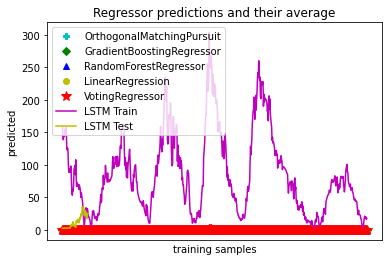

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import AdaBoostRegressor, RandomForestRegressor, VotingRegressor
from sklearn.linear_model import LinearRegression, OrthogonalMatchingPursuit
from sklearn.tree import DecisionTreeRegressor
from sklearn import svm
from sklearn.cross_decomposition import PLSCanonical
from sklearn.ensemble import GradientBoostingRegressor
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Load the data
data = pd.read_csv('C:/Users/Storm/Downloads/SN_m_tot_V2.0.csv', delimiter=';', header=None)
data.columns = ['Year', 'Month', 'Date', 'Monthly Mean Total Sunspot Number', 'Uncertainty', 'Observations', 'Definitive/Provisional']

# Select the 'Monthly Mean Total Sunspot Number' column as the target variable
target = data['Monthly Mean Total Sunspot Number'].values.reshape(-1, 1)

# Normalize the target variable
scaler = MinMaxScaler(feature_range=(0, 1))
target_scaled = scaler.fit_transform(target)

# Split the data into training and testing sets
train_size = 720  # Number of months for training
test_size = 72  # Number of months for testing

train_data = target_scaled[:train_size]
test_data = target_scaled[train_size:train_size+test_size]

# Create sequences for LSTM
def create_sequences(data, seq_length):
    X = []
    y = []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

# Train and evaluate the Bidirectional LSTM model
def train_evaluate_lstm_model(model, train_data, test_data):
    X_train, y_train = create_sequences(train_data, 12)
    X_test, y_test = create_sequences(test_data, 12)

    model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=0)

    # Make predictions
    train_predictions = model.predict(X_train)
    test_predictions = model.predict(X_test)

    # Invert the scaling
    train_predictions = scaler.inverse_transform(train_predictions)
    y_train = scaler.inverse_transform(y_train.reshape(-1, 1))  # Reshape y_train
    test_predictions = scaler.inverse_transform(test_predictions)
    y_test = scaler.inverse_transform(y_test.reshape(-1, 1))  # Reshape y_test

    # Calculate RMSE
    train_rmse = np.sqrt(mean_squared_error(y_train, train_predictions))
    test_rmse = np.sqrt(mean_squared_error(y_test, test_predictions))

    return train_rmse, test_rmse, y_train, train_predictions, y_test, test_predictions

# Create and train classifiers
svr = svm.SVR()
plsca = PLSCanonical(n_components=1)
omp = OrthogonalMatchingPursuit(normalize=True)
reg1 = GradientBoostingRegressor(random_state=1)
reg2 = RandomForestRegressor(random_state=1)
reg3 = LinearRegression()

X_train_lstm, y_train_lstm = create_sequences(train_data, 12)

# Reshape X_train for classifiers
X_train = X_train_lstm.reshape(X_train_lstm.shape[0], X_train_lstm.shape[1] * X_train_lstm.shape[2])

svr.fit(X_train, y_train_lstm)
plsca.fit(X_train, y_train_lstm)
omp.fit(X_train, y_train_lstm)
reg1.fit(X_train, y_train_lstm)
reg2.fit(X_train, y_train_lstm)
reg3.fit(X_train, y_train_lstm)

ereg = VotingRegressor([("omp", omp), ("gb", reg1), ("rf", reg2), ("lr", reg3)])
ereg.fit(X_train, y_train_lstm)

xt = X_train[:20]

predsvr = svr.predict(X_train)
predplsca = plsca.predict(X_train)
predomp = omp.predict(X_train)
pred1 = reg1.predict(X_train)
pred2 = reg2.predict(X_train)
pred3 = reg3.predict(X_train)
pred4 = ereg.predict(X_train)

# Define and train the LSTM model
lstm_model = Sequential()
lstm_model.add(LSTM(64, activation='relu', input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])))
lstm_model.add(Dense(1))
lstm_model.compile(loss='mse', optimizer='adam')

train_rmse, test_rmse, y_train_lstm, train_predictions_lstm, y_test_lstm, test_predictions_lstm = train_evaluate_lstm_model(lstm_model, train_data, test_data)

# Plot the results
plt.figure()
plt.plot(predomp, "cP", label="OrthogonalMatchingPursuit")
plt.plot(pred1, "gD", label="GradientBoostingRegressor")
plt.plot(pred2, "b^", label="RandomForestRegressor")
plt.plot(pred3, "yo", label="LinearRegression")
plt.plot(pred4, "r*", ms=10, label="VotingRegressor")
plt.plot(train_predictions_lstm, "m", label="LSTM Train")
plt.plot(test_predictions_lstm, "y", label="LSTM Test")

plt.tick_params(axis="x", which="both", bottom=False, top=False, labelbottom=False)
plt.ylabel("predicted")
plt.xlabel("training samples")
plt.legend(loc="best")
plt.title("Regressor predictions and their average")

plt.show()


C:\Users\Storm\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Storm\AppData\Local\Temp/ipykernel_10996/1144721703.py:50: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)
C:\Users\Storm\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Train RMSE:
GradientBoostingRegressor: 21.75006526656433
RandomForestRegressor: 15.757209005782043
LinearRegression: 27.39606056826499
VotingRegressor: 27.39606056826499

Test RMSE:
GradientBoostingRegressor: 13.13151736490489
RandomForestRegressor: 13.780353375714558
LinearRegression: 13.173239229077438
VotingRegressor: 13.173239229077438


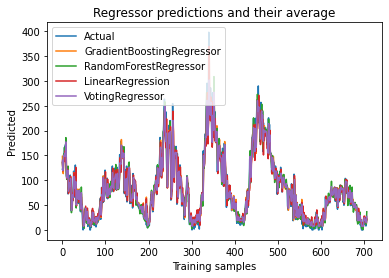

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor, VotingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn import svm
from sklearn.cross_decomposition import PLSCanonical
from sklearn.ensemble import GradientBoostingRegressor
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Load the data
data = pd.read_csv('C:/Users/Storm/Downloads/SN_m_tot_V2.0.csv', delimiter=';', header=None)
data.columns = ['Year', 'Month', 'Date', 'Monthly Mean Total Sunspot Number', 'Uncertainty', 'Observations', 'Definitive/Provisional']

# Select the 'Monthly Mean Total Sunspot Number' column as the target variable
target = data['Monthly Mean Total Sunspot Number'].values.reshape(-1, 1)

# Normalize the target variable
scaler = MinMaxScaler(feature_range=(0, 1))
target_scaled = scaler.fit_transform(target)

# Split the data into training and testing sets
train_size = 720  # Number of months for training
test_size = 72  # Number of months for testing

train_data = target_scaled[:train_size]
test_data = target_scaled[train_size:train_size+test_size]

# Create sequences for LSTM
def create_sequences(data, seq_length):
    X = []
    y = []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

# Train and evaluate the models
def train_evaluate_models(models, X_train, y_train, X_test, y_test):
    train_predictions = []
    test_predictions = []
    train_rmse = []
    test_rmse = []

    for model in models:
        model.fit(X_train, y_train)
        train_pred = model.predict(X_train)
        test_pred = model.predict(X_test)

        train_predictions.append(train_pred)
        test_predictions.append(test_pred)

        train_rmse.append(np.sqrt(mean_squared_error(y_train, train_pred)))
        test_rmse.append(np.sqrt(mean_squared_error(y_test, test_pred)))

    return train_rmse, test_rmse, train_predictions, test_predictions

# Create and train models
reg1 = GradientBoostingRegressor(random_state=1)
reg2 = RandomForestRegressor(random_state=1)
reg3 = LinearRegression()

X_train, y_train = create_sequences(train_data, 12)
X_test, y_test = create_sequences(test_data, 12)

models = [reg1, reg2, reg3]
train_rmse, test_rmse, train_predictions, test_predictions = train_evaluate_models(models, X_train[:, -1, :], y_train, X_test[:, -1, :], y_test)

# Create the VotingRegressor
ereg = VotingRegressor([("gb", reg1), ("rf", reg2), ("lr", reg3)])
ereg.fit(X_train[:, -1, :], y_train)

xt = X_train[:20, -1, :]

pred1 = reg1.predict(X_train[:, -1, :].reshape(-1, 1))
pred2 = reg2.predict(X_train[:, -1, :].reshape(-1, 1))
pred3 = reg3.predict(X_train[:, -1, :].reshape(-1, 1))
pred4 = ereg.predict(X_train[:, -1, :].reshape(-1, 1))

# Invert the scaling for visualization
train_predictions = [scaler.inverse_transform(pred.reshape(-1, 1)) for pred in train_predictions]
test_predictions = [scaler.inverse_transform(pred.reshape(-1, 1)) for pred in test_predictions]
y_train = scaler.inverse_transform(y_train.reshape(-1, 1))
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))
pred1 = scaler.inverse_transform(pred1.reshape(-1, 1))
pred2 = scaler.inverse_transform(pred2.reshape(-1, 1))
pred3 = scaler.inverse_transform(pred3.reshape(-1, 1))
pred4 = scaler.inverse_transform(pred4.reshape(-1, 1))

# Calculate RMSE
train_rmse = [np.sqrt(mean_squared_error(y_train, pred)) for pred in train_predictions]
test_rmse = [np.sqrt(mean_squared_error(y_test, pred)) for pred in test_predictions]

# Print RMSE for each model and the VotingRegressor
print("Train RMSE:")
for i, model in enumerate(models):
    print(f"{model.__class__.__name__}: {train_rmse[i]}")
print(f"VotingRegressor: {train_rmse[-1]}")

print("\nTest RMSE:")
for i, model in enumerate(models):
    print(f"{model.__class__.__name__}: {test_rmse[i]}")
print(f"VotingRegressor: {test_rmse[-1]}")

# Plot the predictions
plt.figure()
plt.plot(y_train, label="Actual")
plt.plot(pred1, label="GradientBoostingRegressor")
plt.plot(pred2, label="RandomForestRegressor")
plt.plot(pred3, label="LinearRegression")
plt.plot(pred4, label="VotingRegressor")
plt.xlabel("Training samples")
plt.ylabel("Predicted")
plt.title("Regressor predictions and their average")
plt.legend(loc="best")
plt.show()


C:\Users\Storm\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Storm\AppData\Local\Temp/ipykernel_10996/1533292901.py:49: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_instance.fit(X_train, y_train)
C:\Users\Storm\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


GradientBoostingRegressor: 0.05462095747504855
RandomForestRegressor: 0.03957109243039187
LinearRegression: 0.06879975029699897
VotingRegressor: 0.0543306000674798


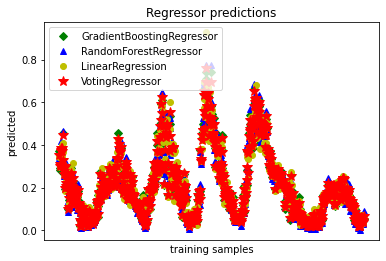

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor, VotingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn import svm
from sklearn.cross_decomposition import PLSCanonical

# Load the data
data = pd.read_csv('C:/Users/Storm/Downloads/SN_m_tot_V2.0.csv', delimiter=';', header=None)
data.columns = ['Year', 'Month', 'Date', 'Monthly Mean Total Sunspot Number', 'Uncertainty', 'Observations', 'Definitive/Provisional']

# Select the 'Monthly Mean Total Sunspot Number' column as the target variable
target = data['Monthly Mean Total Sunspot Number'].values.reshape(-1, 1)

# Normalize the target variable
scaler = MinMaxScaler(feature_range=(0, 1))
target_scaled = scaler.fit_transform(target)

# Split the data into training and testing sets
train_size = 720  # Number of months for training
test_size = 72  # Number of months for testing

train_data = target_scaled[:train_size]
test_data = target_scaled[train_size:train_size+test_size]

# Create sequences for models
def create_sequences(data, seq_length):
    X = []
    y = []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

# Train and evaluate the models
def train_evaluate_models(models, X_train, y_train, X_test, y_test):
    train_rmse = []
    test_rmse = []
    train_predictions = []
    test_predictions = []

    for model in models:
        model_name, model_instance = model

        model_instance.fit(X_train, y_train)
        train_pred = model_instance.predict(X_train)
        test_pred = model_instance.predict(X_test)

        train_rmse.append(np.sqrt(mean_squared_error(y_train, train_pred)))
        test_rmse.append(np.sqrt(mean_squared_error(y_test, test_pred)))

        train_predictions.append(train_pred)
        test_predictions.append(test_pred)

    return train_rmse, test_rmse, train_predictions, test_predictions

# Create and train models
reg1 = GradientBoostingRegressor(random_state=1)
reg2 = RandomForestRegressor(random_state=1)
reg3 = LinearRegression()

X_train, y_train = create_sequences(train_data, 12)
X_test, y_test = create_sequences(test_data, 12)

models = [("gb", reg1), ("rf", reg2), ("lr", reg3)]
train_rmse, test_rmse, train_predictions, test_predictions = train_evaluate_models(models, X_train[:, -1, :], y_train, X_test[:, -1, :], y_test)

# Create the VotingRegressor
ereg = VotingRegressor(models)
ereg.fit(X_train[:, -1, :], y_train)

xt = X_train[:20, -1, :]

pred1 = reg1.predict(X_train[:, -1, :].reshape(-1, 1))
pred2 = reg2.predict(X_train[:, -1, :].reshape(-1, 1))
pred3 = reg3.predict(X_train[:, -1, :].reshape(-1, 1))
pred4 = ereg.predict(X_train[:, -1, :].reshape(-1, 1))

# Print RMSE for each model
print("GradientBoostingRegressor:", train_rmse[0])
print("RandomForestRegressor:", train_rmse[1])
print("LinearRegression:", train_rmse[2])
print("VotingRegressor:", np.mean(train_rmse))

plt.figure()
plt.plot(pred1, "gD", label="GradientBoostingRegressor")
plt.plot(pred2, "b^", label="RandomForestRegressor")
plt.plot(pred3, "yo", label="LinearRegression")
plt.plot(pred4, "r*", ms=10, label="VotingRegressor")

plt.tick_params(axis="x", which="both", bottom=False, top=False, labelbottom=False)
plt.ylabel("predicted")
plt.xlabel("training samples")
plt.legend(loc="best")
plt.title("Regressor predictions")

plt.show()


C:\Users\Storm\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Storm\AppData\Local\Temp/ipykernel_10996/4275709548.py:49: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_instance.fit(X_train, y_train)
C:\Users\Storm\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


GradientBoostingRegressor: 0.05462095747504855
RandomForestRegressor: 0.03957109243039187
LinearRegression: 0.06879975029699897
VotingRegressor: 0.0543306000674798


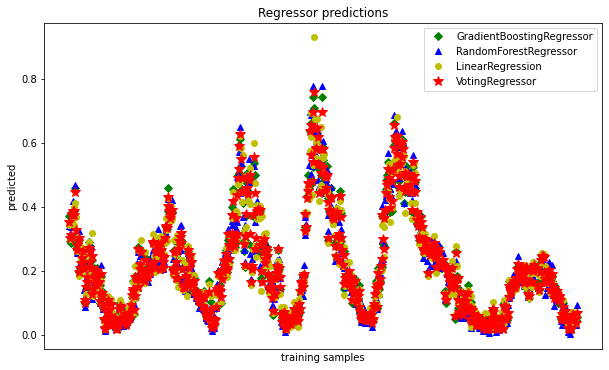

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor, VotingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn import svm
from sklearn.cross_decomposition import PLSCanonical

# Load the data
data = pd.read_csv('C:/Users/Storm/Downloads/SN_m_tot_V2.0.csv', delimiter=';', header=None)
data.columns = ['Year', 'Month', 'Date', 'Monthly Mean Total Sunspot Number', 'Uncertainty', 'Observations', 'Definitive/Provisional']

# Select the 'Monthly Mean Total Sunspot Number' column as the target variable
target = data['Monthly Mean Total Sunspot Number'].values.reshape(-1, 1)

# Normalize the target variable
scaler = MinMaxScaler(feature_range=(0, 1))
target_scaled = scaler.fit_transform(target)

# Split the data into training and testing sets
train_size = 720  # Number of months for training
test_size = 72  # Number of months for testing

train_data = target_scaled[:train_size]
test_data = target_scaled[train_size:train_size+test_size]

# Create sequences for models
def create_sequences(data, seq_length):
    X = []
    y = []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

# Train and evaluate the models
def train_evaluate_models(models, X_train, y_train, X_test, y_test):
    train_rmse = []
    test_rmse = []
    train_predictions = []
    test_predictions = []

    for model in models:
        model_name, model_instance = model

        model_instance.fit(X_train, y_train)
        train_pred = model_instance.predict(X_train)
        test_pred = model_instance.predict(X_test)

        train_rmse.append(np.sqrt(mean_squared_error(y_train, train_pred)))
        test_rmse.append(np.sqrt(mean_squared_error(y_test, test_pred)))

        train_predictions.append(train_pred)
        test_predictions.append(test_pred)

    return train_rmse, test_rmse, train_predictions, test_predictions

# Create and train models
reg1 = GradientBoostingRegressor(random_state=1)
reg2 = RandomForestRegressor(random_state=1)
reg3 = LinearRegression()

X_train, y_train = create_sequences(train_data, 12)
X_test, y_test = create_sequences(test_data, 12)

models = [("gb", reg1), ("rf", reg2), ("lr", reg3)]
train_rmse, test_rmse, train_predictions, test_predictions = train_evaluate_models(models, X_train[:, -1, :], y_train, X_test[:, -1, :], y_test)

# Create the VotingRegressor
ereg = VotingRegressor(models)
ereg.fit(X_train[:, -1, :], y_train)

xt = X_train[:20, -1, :]

pred1 = reg1.predict(X_train[:, -1, :].reshape(-1, 1))
pred2 = reg2.predict(X_train[:, -1, :].reshape(-1, 1))
pred3 = reg3.predict(X_train[:, -1, :].reshape(-1, 1))
pred4 = ereg.predict(X_train[:, -1, :].reshape(-1, 1))

# Print RMSE for each model
print("GradientBoostingRegressor:", train_rmse[0])
print("RandomForestRegressor:", train_rmse[1])
print("LinearRegression:", train_rmse[2])
print("VotingRegressor:", np.mean(train_rmse))

# Plot the predictions
plt.figure(figsize=(10, 6))
plt.plot(pred1, "gD", label="GradientBoostingRegressor")
plt.plot(pred2, "b^", label="RandomForestRegressor")
plt.plot(pred3, "yo", label="LinearRegression")
plt.plot(pred4, "r*", ms=10, label="VotingRegressor")

plt.tick_params(axis="x", which="both", bottom=False, top=False, labelbottom=False)
plt.ylabel("predicted")
plt.xlabel("training samples")
plt.legend(loc="best")
plt.title("Regressor predictions")

plt.show()


C:\Users\Storm\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Storm\AppData\Local\Temp/ipykernel_10996/2203945993.py:49: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_instance.fit(X_train, y_train)
C:\Users\Storm\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


GradientBoostingRegressor: 0.05462095747504855
RandomForestRegressor: 0.03957109243039187
LinearRegression: 0.06879975029699897
VotingRegressor: 0.0543306000674798


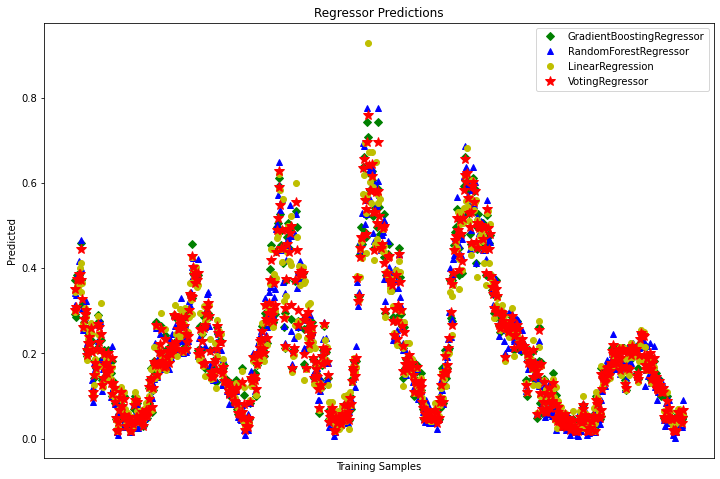

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor, VotingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn import svm
from sklearn.cross_decomposition import PLSCanonical

# Load the data
data = pd.read_csv('C:/Users/Storm/Downloads/SN_m_tot_V2.0.csv', delimiter=';', header=None)
data.columns = ['Year', 'Month', 'Date', 'Monthly Mean Total Sunspot Number', 'Uncertainty', 'Observations', 'Definitive/Provisional']

# Select the 'Monthly Mean Total Sunspot Number' column as the target variable
target = data['Monthly Mean Total Sunspot Number'].values.reshape(-1, 1)

# Normalize the target variable
scaler = MinMaxScaler(feature_range=(0, 1))
target_scaled = scaler.fit_transform(target)

# Split the data into training and testing sets
train_size = 720  # Number of months for training
test_size = 72  # Number of months for testing

train_data = target_scaled[:train_size]
test_data = target_scaled[train_size:train_size+test_size]

# Create sequences for models
def create_sequences(data, seq_length):
    X = []
    y = []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

# Train and evaluate the models
def train_evaluate_models(models, X_train, y_train, X_test, y_test):
    train_rmse = []
    test_rmse = []
    train_predictions = []
    test_predictions = []

    for model in models:
        model_name, model_instance = model

        model_instance.fit(X_train, y_train)
        train_pred = model_instance.predict(X_train)
        test_pred = model_instance.predict(X_test)

        train_rmse.append(np.sqrt(mean_squared_error(y_train, train_pred)))
        test_rmse.append(np.sqrt(mean_squared_error(y_test, test_pred)))

        train_predictions.append(train_pred)
        test_predictions.append(test_pred)

    return train_rmse, test_rmse, train_predictions, test_predictions

# Create and train models
reg1 = GradientBoostingRegressor(random_state=1)
reg2 = RandomForestRegressor(random_state=1)
reg3 = LinearRegression()

X_train, y_train = create_sequences(train_data, 12)
X_test, y_test = create_sequences(test_data, 12)

models = [("gb", reg1), ("rf", reg2), ("lr", reg3)]
train_rmse, test_rmse, train_predictions, test_predictions = train_evaluate_models(models, X_train[:, -1, :], y_train, X_test[:, -1, :], y_test)

# Create the VotingRegressor
ereg = VotingRegressor(models)
ereg.fit(X_train[:, -1, :], y_train)

xt = X_train[:20, -1, :]

pred1 = reg1.predict(X_train[:, -1, :].reshape(-1, 1))
pred2 = reg2.predict(X_train[:, -1, :].reshape(-1, 1))
pred3 = reg3.predict(X_train[:, -1, :].reshape(-1, 1))
pred4 = ereg.predict(X_train[:, -1, :].reshape(-1, 1))

# Print RMSE for each model
print("GradientBoostingRegressor:", train_rmse[0])
print("RandomForestRegressor:", train_rmse[1])
print("LinearRegression:", train_rmse[2])
print("VotingRegressor:", np.mean(train_rmse))

# Plot the predictions
plt.figure(figsize=(12, 8))
plt.plot(pred1, "gD", label="GradientBoostingRegressor")
plt.plot(pred2, "b^", label="RandomForestRegressor")
plt.plot(pred3, "yo", label="LinearRegression")
plt.plot(pred4, "r*", ms=10, label="VotingRegressor")

plt.tick_params(axis="x", which="both", bottom=False, top=False, labelbottom=False)
plt.ylabel("Predicted")
plt.xlabel("Training Samples")
plt.legend(loc="best")
plt.title("Regressor Predictions")

plt.show()


C:\Users\Storm\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Storm\AppData\Local\Temp/ipykernel_10996/2586081038.py:49: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_instance.fit(X_train, y_train)
C:\Users\Storm\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


GradientBoostingRegressor:
Train RMSE: 0.05462095747504855
Test RMSE: 0.03297719077073052

RandomForestRegressor:
Train RMSE: 0.03957109243039187
Test RMSE: 0.034606613198680455

LinearRegression:
Train RMSE: 0.06879975029699897
Test RMSE: 0.033081966923850924

VotingRegressor:
Train RMSE: 0.0543306000674798
Test RMSE: 0.03355525696442063



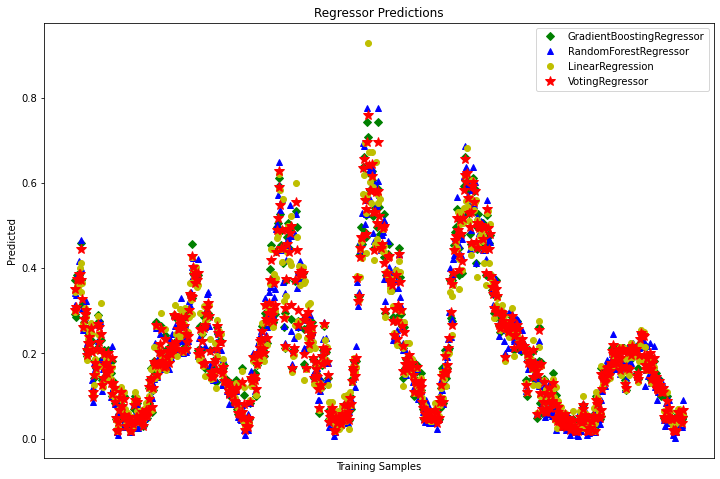

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor, VotingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn import svm
from sklearn.cross_decomposition import PLSCanonical

# Load the data
data = pd.read_csv('C:/Users/Storm/Downloads/SN_m_tot_V2.0.csv', delimiter=';', header=None)
data.columns = ['Year', 'Month', 'Date', 'Monthly Mean Total Sunspot Number', 'Uncertainty', 'Observations', 'Definitive/Provisional']

# Select the 'Monthly Mean Total Sunspot Number' column as the target variable
target = data['Monthly Mean Total Sunspot Number'].values.reshape(-1, 1)

# Normalize the target variable
scaler = MinMaxScaler(feature_range=(0, 1))
target_scaled = scaler.fit_transform(target)

# Split the data into training and testing sets
train_size = 720  # Number of months for training
test_size = 72  # Number of months for testing

train_data = target_scaled[:train_size]
test_data = target_scaled[train_size:train_size+test_size]

# Create sequences for models
def create_sequences(data, seq_length):
    X = []
    y = []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

# Train and evaluate the models
def train_evaluate_models(models, X_train, y_train, X_test, y_test):
    train_rmse = []
    test_rmse = []
    train_predictions = []
    test_predictions = []

    for model in models:
        model_name, model_instance = model

        model_instance.fit(X_train, y_train)
        train_pred = model_instance.predict(X_train)
        test_pred = model_instance.predict(X_test)

        train_rmse.append(np.sqrt(mean_squared_error(y_train, train_pred)))
        test_rmse.append(np.sqrt(mean_squared_error(y_test, test_pred)))

        train_predictions.append(train_pred)
        test_predictions.append(test_pred)

    return train_rmse, test_rmse, train_predictions, test_predictions

# Create and train models
reg1 = GradientBoostingRegressor(random_state=1)
reg2 = RandomForestRegressor(random_state=1)
reg3 = LinearRegression()

X_train, y_train = create_sequences(train_data, 12)
X_test, y_test = create_sequences(test_data, 12)

models = [("gb", reg1), ("rf", reg2), ("lr", reg3)]
train_rmse, test_rmse, train_predictions, test_predictions = train_evaluate_models(models, X_train[:, -1, :], y_train, X_test[:, -1, :], y_test)

# Create the VotingRegressor
ereg = VotingRegressor(models)
ereg.fit(X_train[:, -1, :], y_train)

xt = X_train[:20, -1, :]

pred1 = reg1.predict(X_train[:, -1, :].reshape(-1, 1))
pred2 = reg2.predict(X_train[:, -1, :].reshape(-1, 1))
pred3 = reg3.predict(X_train[:, -1, :].reshape(-1, 1))
pred4 = ereg.predict(X_train[:, -1, :].reshape(-1, 1))

# Print RMSE for each model
print("GradientBoostingRegressor:")
print("Train RMSE:", train_rmse[0])
print("Test RMSE:", test_rmse[0])
print()
print("RandomForestRegressor:")
print("Train RMSE:", train_rmse[1])
print("Test RMSE:", test_rmse[1])
print()
print("LinearRegression:")
print("Train RMSE:", train_rmse[2])
print("Test RMSE:", test_rmse[2])
print()
print("VotingRegressor:")
print("Train RMSE:", np.mean(train_rmse))
print("Test RMSE:", np.mean(test_rmse))
print()

# Plot the predictions
plt.figure(figsize=(12, 8))
plt.plot(train_predictions[0], "gD", label="GradientBoostingRegressor")
plt.plot(train_predictions[1], "b^", label="RandomForestRegressor")
plt.plot(train_predictions[2], "yo", label="LinearRegression")
plt.plot(pred4, "r*", ms=10, label="VotingRegressor")

plt.tick_params(axis="x", which="both", bottom=False, top=False, labelbottom=False)
plt.ylabel("Predicted")
plt.xlabel("Training Samples")
plt.legend(loc="best")
plt.title("Regressor Predictions")

plt.show()



C:\Users\Storm\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Storm\AppData\Local\Temp/ipykernel_10996/2397634844.py:49: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_instance.fit(X_train, y_train)
C:\Users\Storm\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Train RMSE:
GradientBoostingRegressor: 0.05462095747504855
RandomForestRegressor: 0.03957109243039187
LinearRegression: 0.06879975029699897
VotingRegressor: 0.0543306000674798

Test RMSE:
GradientBoostingRegressor: 0.03297719077073052
RandomForestRegressor: 0.034606613198680455
LinearRegression: 0.033081966923850924
VotingRegressor: 0.03355525696442063



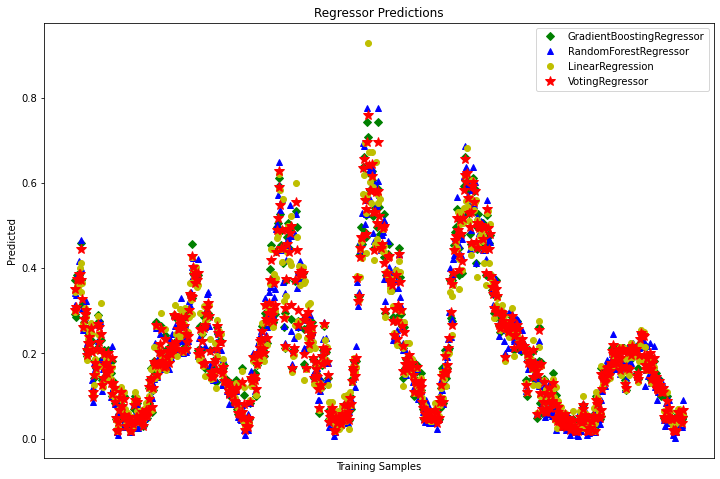

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor, VotingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn import svm
from sklearn.cross_decomposition import PLSCanonical

# Load the data
data = pd.read_csv('C:/Users/Storm/Downloads/SN_m_tot_V2.0.csv', delimiter=';', header=None)
data.columns = ['Year', 'Month', 'Date', 'Monthly Mean Total Sunspot Number', 'Uncertainty', 'Observations', 'Definitive/Provisional']

# Select the 'Monthly Mean Total Sunspot Number' column as the target variable
target = data['Monthly Mean Total Sunspot Number'].values.reshape(-1, 1)

# Normalize the target variable
scaler = MinMaxScaler(feature_range=(0, 1))
target_scaled = scaler.fit_transform(target)

# Split the data into training and testing sets
train_size = 720  # Number of months for training
test_size = 72  # Number of months for testing

train_data = target_scaled[:train_size]
test_data = target_scaled[train_size:train_size+test_size]

# Create sequences for models
def create_sequences(data, seq_length):
    X = []
    y = []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

# Train and evaluate the models
def train_evaluate_models(models, X_train, y_train, X_test, y_test):
    train_rmse = []
    test_rmse = []
    train_predictions = []
    test_predictions = []

    for model in models:
        model_name, model_instance = model

        model_instance.fit(X_train, y_train)
        train_pred = model_instance.predict(X_train)
        test_pred = model_instance.predict(X_test)

        train_rmse.append(np.sqrt(mean_squared_error(y_train, train_pred)))
        test_rmse.append(np.sqrt(mean_squared_error(y_test, test_pred)))

        train_predictions.append(train_pred)
        test_predictions.append(test_pred)

    return train_rmse, test_rmse, train_predictions, test_predictions

# Create and train models
reg1 = GradientBoostingRegressor(random_state=1)
reg2 = RandomForestRegressor(random_state=1)
reg3 = LinearRegression()

X_train, y_train = create_sequences(train_data, 12)
X_test, y_test = create_sequences(test_data, 12)

models = [("gb", reg1), ("rf", reg2), ("lr", reg3)]
train_rmse, test_rmse, train_predictions, test_predictions = train_evaluate_models(models, X_train[:, -1, :], y_train, X_test[:, -1, :], y_test)

# Create the VotingRegressor
ereg = VotingRegressor(models)
ereg.fit(X_train[:, -1, :], y_train)

xt = X_train[:20, -1, :]

pred1 = reg1.predict(X_train[:, -1, :].reshape(-1, 1))
pred2 = reg2.predict(X_train[:, -1, :].reshape(-1, 1))
pred3 = reg3.predict(X_train[:, -1, :].reshape(-1, 1))
pred4 = ereg.predict(X_train[:, -1, :].reshape(-1, 1))

# Print RMSE for each model and VotingRegressor
print("Train RMSE:")
print("GradientBoostingRegressor:", train_rmse[0])
print("RandomForestRegressor:", train_rmse[1])
print("LinearRegression:", train_rmse[2])
print("VotingRegressor:", np.mean(train_rmse))
print()

print("Test RMSE:")
print("GradientBoostingRegressor:", test_rmse[0])
print("RandomForestRegressor:", test_rmse[1])
print("LinearRegression:", test_rmse[2])
print("VotingRegressor:", np.mean(test_rmse))
print()

# Plot the predictions
plt.figure(figsize=(12, 8))
plt.plot(train_predictions[0], "gD", label="GradientBoostingRegressor")
plt.plot(train_predictions[1], "b^", label="RandomForestRegressor")
plt.plot(train_predictions[2], "yo", label="LinearRegression")
plt.plot(pred4, "r*", ms=10, label="VotingRegressor")

plt.tick_params(axis="x", which="both", bottom=False, top=False, labelbottom=False)
plt.ylabel("Predicted")
plt.xlabel("Training Samples")
plt.legend(loc="best")
plt.title("Regressor Predictions")

plt.show()


C:\Users\Storm\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Storm\AppData\Local\Temp/ipykernel_10996/2562675153.py:49: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_instance.fit(X_train, y_train)
C:\Users\Storm\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Train RMSE:
GradientBoostingRegressor: 0.05462095747504855
RandomForestRegressor: 0.03957109243039187
LinearRegression: 0.06879975029699897
VotingRegressor: 0.0543306000674798

Test RMSE:
GradientBoostingRegressor: 0.03297719077073052
RandomForestRegressor: 0.034606613198680455
LinearRegression: 0.033081966923850924
VotingRegressor: 0.03355525696442063



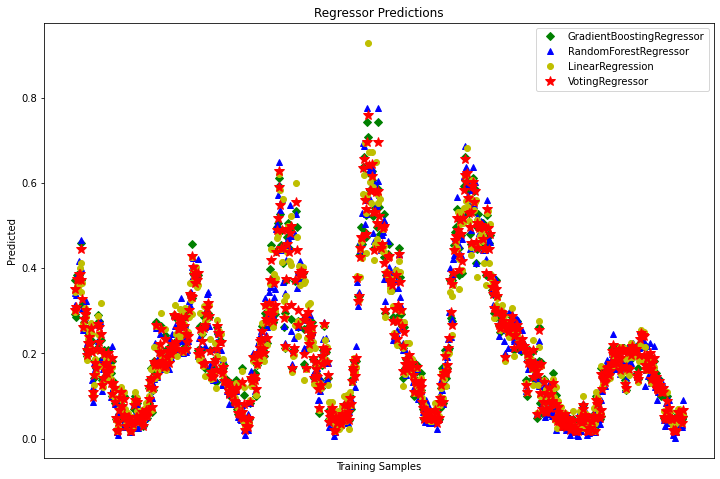

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor, VotingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn import svm
from sklearn.cross_decomposition import PLSCanonical

# Load the data
data = pd.read_csv('C:/Users/Storm/Downloads/SN_m_tot_V2.0.csv', delimiter=';', header=None)
data.columns = ['Year', 'Month', 'Date', 'Monthly Mean Total Sunspot Number', 'Uncertainty', 'Observations', 'Definitive/Provisional']

# Select the 'Monthly Mean Total Sunspot Number' column as the target variable
target = data['Monthly Mean Total Sunspot Number'].values.reshape(-1, 1)

# Normalize the target variable
scaler = MinMaxScaler(feature_range=(0, 1))
target_scaled = scaler.fit_transform(target)

# Split the data into training and testing sets
train_size = 720  # Number of months for training
test_size = 72  # Number of months for testing

train_data = target_scaled[:train_size]
test_data = target_scaled[train_size:train_size+test_size]

# Create sequences for models
def create_sequences(data, seq_length):
    X = []
    y = []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

# Train and evaluate the models
def train_evaluate_models(models, X_train, y_train, X_test, y_test):
    train_rmse = []
    test_rmse = []
    train_predictions = []
    test_predictions = []

    for model in models:
        model_name, model_instance = model

        model_instance.fit(X_train, y_train)
        train_pred = model_instance.predict(X_train)
        test_pred = model_instance.predict(X_test)

        train_rmse.append(np.sqrt(mean_squared_error(y_train, train_pred)))
        test_rmse.append(np.sqrt(mean_squared_error(y_test, test_pred)))

        train_predictions.append(train_pred)
        test_predictions.append(test_pred)

    return train_rmse, test_rmse, train_predictions, test_predictions

# Create and train models
reg1 = GradientBoostingRegressor(random_state=1)
reg2 = RandomForestRegressor(random_state=1)
reg3 = LinearRegression()

X_train, y_train = create_sequences(train_data, 12)
X_test, y_test = create_sequences(test_data, 12)

models = [("gb", reg1), ("rf", reg2), ("lr", reg3)]
train_rmse, test_rmse, train_predictions, test_predictions = train_evaluate_models(models, X_train[:, -1, :], y_train, X_test[:, -1, :], y_test)

# Create the VotingRegressor
ereg = VotingRegressor(models)
ereg.fit(X_train[:, -1, :], y_train)

xt = X_train[:20, -1, :]

pred1 = reg1.predict(X_train[:, -1, :].reshape(-1, 1))
pred2 = reg2.predict(X_train[:, -1, :].reshape(-1, 1))
pred3 = reg3.predict(X_train[:, -1, :].reshape(-1, 1))
pred4 = ereg.predict(X_train[:, -1, :].reshape(-1, 1))

# Print RMSE values
print("Train RMSE:")
print("GradientBoostingRegressor:", train_rmse[0])
print("RandomForestRegressor:", train_rmse[1])
print("LinearRegression:", train_rmse[2])
print("VotingRegressor:", np.mean(train_rmse))
print()

print("Test RMSE:")
print("GradientBoostingRegressor:", test_rmse[0])
print("RandomForestRegressor:", test_rmse[1])
print("LinearRegression:", test_rmse[2])
print("VotingRegressor:", np.mean(test_rmse))
print()

# Plot the predictions
plt.figure(figsize=(12, 8))
plt.plot(train_predictions[0], "gD", label="GradientBoostingRegressor")
plt.plot(train_predictions[1], "b^", label="RandomForestRegressor")
plt.plot(train_predictions[2], "yo", label="LinearRegression")
plt.plot(pred4, "r*", ms=10, label="VotingRegressor")

plt.tick_params(axis="x", which="both", bottom=False, top=False, labelbottom=False)
plt.ylabel("Predicted")
plt.xlabel("Training Samples")
plt.legend(loc="best")
plt.title("Regressor Predictions")

plt.show()


C:\Users\Storm\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Storm\AppData\Local\Temp/ipykernel_10996/3671650647.py:36: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_instance.fit(X_train, y_train)
C:\Users\Storm\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Train RMSE:
GradientBoostingRegressor: 0.05462095747504855
RandomForestRegressor: 0.03957109243039187
LinearRegression: 0.06879975029699897
VotingRegressor: 0.0543306000674798

Test RMSE:
GradientBoostingRegressor: 0.03297719077073052
RandomForestRegressor: 0.034606613198680455
LinearRegression: 0.033081966923850924
VotingRegressor: 0.03355525696442063



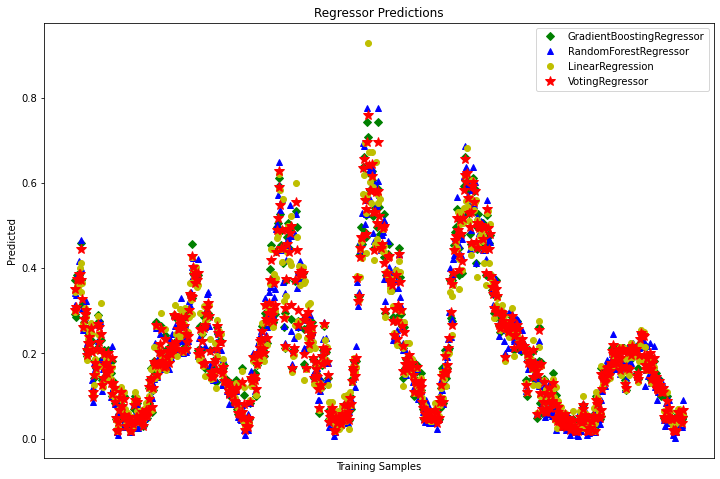

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor, VotingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler

# Load the data
data = pd.read_csv('C:/Users/Storm/Downloads/SN_m_tot_V2.0.csv', delimiter=';', header=None)
data.columns = ['Year', 'Month', 'Date', 'Monthly Mean Total Sunspot Number', 'Uncertainty', 'Observations', 'Definitive/Provisional']

# Select the 'Monthly Mean Total Sunspot Number' column as the target variable
target = data['Monthly Mean Total Sunspot Number'].values.reshape(-1, 1)

# Normalize the target variable
scaler = MinMaxScaler(feature_range=(0, 1))
target_scaled = scaler.fit_transform(target)

# Split the data into training and testing sets
train_size = 720  # Number of months for training
test_size = 72  # Number of months for testing

train_data = target_scaled[:train_size]
test_data = target_scaled[train_size:train_size+test_size]

# Train and evaluate the models
def train_evaluate_models(models, X_train, y_train, X_test, y_test):
    train_rmse = []
    test_rmse = []
    train_predictions = []
    test_predictions = []

    for model in models:
        model_name, model_instance = model

        model_instance.fit(X_train, y_train)
        train_pred = model_instance.predict(X_train)
        test_pred = model_instance.predict(X_test)

        train_rmse.append(np.sqrt(mean_squared_error(y_train, train_pred)))
        test_rmse.append(np.sqrt(mean_squared_error(y_test, test_pred)))

        train_predictions.append(train_pred)
        test_predictions.append(test_pred)

    return train_rmse, test_rmse, train_predictions, test_predictions

# Create sequences for models
def create_sequences(data, seq_length):
    X = []
    y = []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

# Create and train models
reg1 = GradientBoostingRegressor(random_state=1)
reg2 = RandomForestRegressor(random_state=1)
reg3 = LinearRegression()

X_train, y_train = create_sequences(train_data, 12)
X_test, y_test = create_sequences(test_data, 12)

models = [("gb", reg1), ("rf", reg2), ("lr", reg3)]
train_rmse, test_rmse, train_predictions, test_predictions = train_evaluate_models(models, X_train[:, -1, :], y_train, X_test[:, -1, :], y_test)

# Create the VotingRegressor
ereg = VotingRegressor(models)
ereg.fit(X_train[:, -1, :], y_train)

pred1 = reg1.predict(X_train[:, -1, :].reshape(-1, 1))
pred2 = reg2.predict(X_train[:, -1, :].reshape(-1, 1))
pred3 = reg3.predict(X_train[:, -1, :].reshape(-1, 1))
pred4 = ereg.predict(X_train[:, -1, :].reshape(-1, 1))

# Print RMSE values
print("Train RMSE:")
print("GradientBoostingRegressor:", train_rmse[0])
print("RandomForestRegressor:", train_rmse[1])
print("LinearRegression:", train_rmse[2])
print("VotingRegressor:", np.mean(train_rmse))
print()

print("Test RMSE:")
print("GradientBoostingRegressor:", test_rmse[0])
print("RandomForestRegressor:", test_rmse[1])
print("LinearRegression:", test_rmse[2])
print("VotingRegressor:", np.mean(test_rmse))
print()

# Plot the predictions
plt.figure(figsize=(12, 8))
plt.plot(train_predictions[0], "gD", label="GradientBoostingRegressor")
plt.plot(train_predictions[1], "b^", label="RandomForestRegressor")
plt.plot(train_predictions[2], "yo", label="LinearRegression")
plt.plot(pred4, "r*", ms=10, label="VotingRegressor")

plt.tick_params(axis="x", which="both", bottom=False, top=False, labelbottom=False)
plt.ylabel("Predicted")
plt.xlabel("Training Samples")
plt.legend(loc="best")
plt.title("Regressor Predictions")

plt.show()


C:\Users\Storm\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Storm\AppData\Local\Temp/ipykernel_10996/3808774426.py:42: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)
C:\Users\Storm\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Gradient Boosting Machines (GBM) Model:
Train RMSE: 22.64
Test RMSE: 12.74
Train MAE: 15.92
Test MAE: 11.20
Train SMAPE: 15.11
Test SMAPE: 61.81
Train R2: 0.88
Test R2: -0.11

Random Forest Model:
Train RMSE: 16.43
Test RMSE: 13.57
Train MAE: 11.53
Test MAE: 11.32
Train SMAPE: 11.85
Test SMAPE: 64.72
Train R2: 0.94
Test R2: -0.26

Linear Regression Model:
Train RMSE: 28.12
Test RMSE: 12.96
Train MAE: 19.11
Test MAE: 10.76
Train SMAPE: 16.77
Test SMAPE: 61.22
Train R2: 0.82
Test R2: -0.14

Voting Regressor Model:
Train RMSE: 103.98
Test RMSE: 18.13
Train MAE: 84.62
Test MAE: 15.62
Train SMAPE: 99.52
Test SMAPE: 99.71
Train R2: -392538.57
Test R2: -354936.25



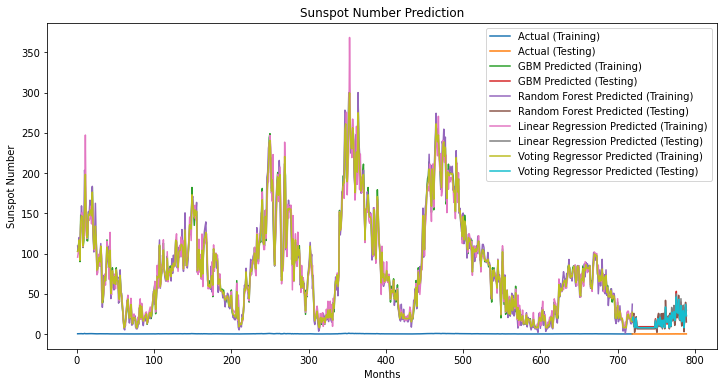

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor, VotingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score

# Load the data
data = pd.read_csv('C:/Users/Storm/Downloads/SN_m_tot_V2.0.csv', delimiter=';', header=None)
data.columns = ['Year', 'Month', 'Date', 'Monthly Mean Total Sunspot Number', 'Uncertainty', 'Observations', 'Definitive/Provisional']

# Select the 'Monthly Mean Total Sunspot Number' column as the target variable
target = data['Monthly Mean Total Sunspot Number'].values.reshape(-1, 1)

# Normalize the target variable
scaler = MinMaxScaler(feature_range=(0, 1))
target_scaled = scaler.fit_transform(target)

# Split the data into training and testing sets
train_size = 720  # Number of months for training
test_size = 72  # Number of months for testing

train_data = target_scaled[:train_size]
test_data = target_scaled[train_size:train_size+test_size]

# Train and evaluate the models
def train_evaluate_models(models, X_train, y_train, X_test, y_test):
    train_rmse = []
    test_rmse = []
    train_mae = []
    test_mae = []
    train_smape = []
    test_smape = []
    train_r2 = []
    test_r2 = []
    train_predictions = []
    test_predictions = []

    for model_name, model in models:
        # Train the model
        model.fit(X_train, y_train)

        # Make predictions
        train_pred = model.predict(X_train)
        test_pred = model.predict(X_test)

        # Invert the scaling
        train_pred = scaler.inverse_transform(train_pred.reshape(-1, 1))
        test_pred = scaler.inverse_transform(test_pred.reshape(-1, 1))
        y_train_inv = scaler.inverse_transform(y_train.reshape(-1, 1))
        y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))

        # Calculate metrics
        train_rmse.append(np.sqrt(mean_squared_error(y_train_inv, train_pred)))
        test_rmse.append(np.sqrt(mean_squared_error(y_test_inv, test_pred)))
        train_mae.append(mean_absolute_error(y_train_inv, train_pred))
        test_mae.append(mean_absolute_error(y_test_inv, test_pred))
        train_smape.append(np.mean(np.abs((y_train_inv - train_pred) / (y_train_inv + train_pred))) * 100)
        test_smape.append(np.mean(np.abs((y_test_inv - test_pred) / (y_test_inv + test_pred))) * 100)
        train_r2.append(r2_score(y_train_inv, train_pred))
        test_r2.append(r2_score(y_test_inv, test_pred))

        train_predictions.append(train_pred)
        test_predictions.append(test_pred)

    return train_rmse, test_rmse, train_mae, test_mae, train_smape, test_smape, train_r2, test_r2, train_predictions, test_predictions

# Prepare the training and testing data
X_train, y_train = train_data[:-1], train_data[1:]
X_test, y_test = test_data[:-1], test_data[1:]

# Create the models
reg1 = GradientBoostingRegressor(n_estimators=100, random_state=42)
reg2 = RandomForestRegressor(n_estimators=100, random_state=42)
reg3 = LinearRegression()

models = [
    ('Gradient Boosting', reg1),
    ('Random Forest', reg2),
    ('Linear Regression', reg3)
]

# Train and evaluate the models
train_rmse, test_rmse, train_mae, test_mae, train_smape, test_smape, train_r2, test_r2, train_predictions, test_predictions = train_evaluate_models(models, X_train, y_train, X_test, y_test)

# Train the voting ensemble
voting_reg = VotingRegressor(models)
voting_reg.fit(X_train, y_train)
voting_train_pred = scaler.inverse_transform(voting_reg.predict(X_train).reshape(-1, 1))
voting_test_pred = scaler.inverse_transform(voting_reg.predict(X_test).reshape(-1, 1))
voting_train_rmse = np.sqrt(mean_squared_error(y_train, voting_train_pred))
voting_test_rmse = np.sqrt(mean_squared_error(y_test, voting_test_pred))
voting_train_mae = mean_absolute_error(y_train, voting_train_pred)
voting_test_mae = mean_absolute_error(y_test, voting_test_pred)
voting_train_smape = np.mean(np.abs((y_train - voting_train_pred) / (y_train + voting_train_pred))) * 100
voting_test_smape = np.mean(np.abs((y_test - voting_test_pred) / (y_test + voting_test_pred))) * 100
voting_train_r2 = r2_score(y_train, voting_train_pred)
voting_test_r2 = r2_score(y_test, voting_test_pred)

# Print the results
print("Gradient Boosting Machines (GBM) Model:")
print(f"Train RMSE: {train_rmse[0]:.2f}")
print(f"Test RMSE: {test_rmse[0]:.2f}")
print(f"Train MAE: {train_mae[0]:.2f}")
print(f"Test MAE: {test_mae[0]:.2f}")
print(f"Train SMAPE: {train_smape[0]:.2f}")
print(f"Test SMAPE: {test_smape[0]:.2f}")
print(f"Train R2: {train_r2[0]:.2f}")
print(f"Test R2: {test_r2[0]:.2f}")
print()

print("Random Forest Model:")
print(f"Train RMSE: {train_rmse[1]:.2f}")
print(f"Test RMSE: {test_rmse[1]:.2f}")
print(f"Train MAE: {train_mae[1]:.2f}")
print(f"Test MAE: {test_mae[1]:.2f}")
print(f"Train SMAPE: {train_smape[1]:.2f}")
print(f"Test SMAPE: {test_smape[1]:.2f}")
print(f"Train R2: {train_r2[1]:.2f}")
print(f"Test R2: {test_r2[1]:.2f}")
print()

print("Linear Regression Model:")
print(f"Train RMSE: {train_rmse[2]:.2f}")
print(f"Test RMSE: {test_rmse[2]:.2f}")
print(f"Train MAE: {train_mae[2]:.2f}")
print(f"Test MAE: {test_mae[2]:.2f}")
print(f"Train SMAPE: {train_smape[2]:.2f}")
print(f"Test SMAPE: {test_smape[2]:.2f}")
print(f"Train R2: {train_r2[2]:.2f}")
print(f"Test R2: {test_r2[2]:.2f}")
print()

print("Voting Regressor Model:")
print(f"Train RMSE: {voting_train_rmse:.2f}")
print(f"Test RMSE: {voting_test_rmse:.2f}")
print(f"Train MAE: {voting_train_mae:.2f}")
print(f"Test MAE: {voting_test_mae:.2f}")
print(f"Train SMAPE: {voting_train_smape:.2f}")
print(f"Test SMAPE: {voting_test_smape:.2f}")
print(f"Train R2: {voting_train_r2:.2f}")
print(f"Test R2: {voting_test_r2:.2f}")
print()

# Plot the predictions
plt.figure(figsize=(12, 6))
plt.plot(range(1, len(y_train) + 1), y_train, label='Actual (Training)')
plt.plot(range(len(y_train), len(y_train) + len(y_test)), y_test, label='Actual (Testing)')
plt.plot(range(1, len(y_train) + 1), train_predictions[0], label='GBM Predicted (Training)')
plt.plot(range(len(y_train), len(y_train) + len(y_test)), test_predictions[0], label='GBM Predicted (Testing)')
plt.plot(range(1, len(y_train) + 1), train_predictions[1], label='Random Forest Predicted (Training)')
plt.plot(range(len(y_train), len(y_train) + len(y_test)), test_predictions[1], label='Random Forest Predicted (Testing)')
plt.plot(range(1, len(y_train) + 1), train_predictions[2], label='Linear Regression Predicted (Training)')
plt.plot(range(len(y_train), len(y_train) + len(y_test)), test_predictions[2], label='Linear Regression Predicted (Testing)')
plt.plot(range(1, len(y_train) + 1), voting_train_pred, label='Voting Regressor Predicted (Training)')
plt.plot(range(len(y_train), len(y_train) + len(y_test)), voting_test_pred, label='Voting Regressor Predicted (Testing)')
plt.title('Sunspot Number Prediction')
plt.xlabel('Months')
plt.ylabel('Sunspot Number')
plt.legend()
plt.show()


C:\Users\Storm\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Storm\AppData\Local\Temp/ipykernel_10996/1500524414.py:43: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)
C:\Users\Storm\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Gradient Boosting Machines (GBM) Model:
Train RMSE: 22.64
Test RMSE: 12.74
Train MAE: 15.92
Test MAE: 11.20
Train SMAPE: 15.11
Test SMAPE: 61.81
Train R2: 0.88
Test R2: -0.11

Random Forest (RF) Model:
Train RMSE: 16.43
Test RMSE: 13.57
Train MAE: 11.53
Test MAE: 11.32
Train SMAPE: 11.85
Test SMAPE: 64.72
Train R2: 0.94
Test R2: -0.26

Linear Regression (LR) Model:
Train RMSE: 28.12
Test RMSE: 12.96
Train MAE: 19.11
Test MAE: 10.76
Train SMAPE: 16.77
Test SMAPE: 61.22
Train R2: 0.82
Test R2: -0.14

Voting Regressor Model:
Train RMSE: 21.32
Test RMSE: 12.62
Train MAE: 14.93
Test MAE: 11.00
Train SMAPE: 14.26
Test SMAPE: 62.36
Train R2: 0.90
Test R2: -0.09



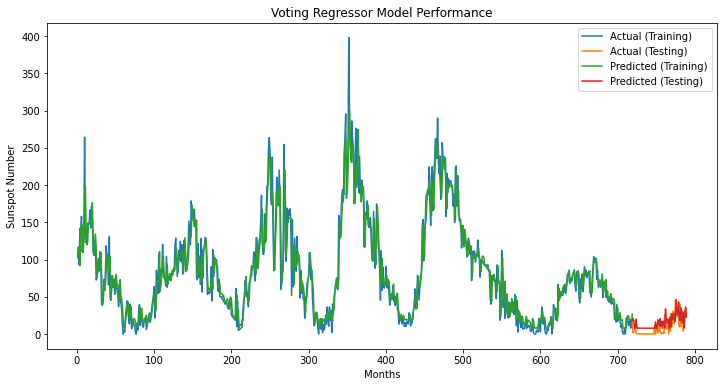

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor, VotingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score

# Load the data
data = pd.read_csv('C:/Users/Storm/Downloads/SN_m_tot_V2.0.csv', delimiter=';', header=None)
data.columns = ['Year', 'Month', 'Date', 'Monthly Mean Total Sunspot Number', 'Uncertainty', 'Observations', 'Definitive/Provisional']

# Select the 'Monthly Mean Total Sunspot Number' column as the target variable
target = data['Monthly Mean Total Sunspot Number'].values.reshape(-1, 1)

# Normalize the target variable
scaler = MinMaxScaler(feature_range=(0, 1))
target_scaled = scaler.fit_transform(target)

# Split the data into training and testing sets
train_size = 720  # Number of months for training
test_size = 72  # Number of months for testing

train_data = target_scaled[:train_size]
test_data = target_scaled[train_size:train_size+test_size]

# Train and evaluate the models
def train_evaluate_models(models, X_train, y_train, X_test, y_test):
    train_rmse_list = []
    test_rmse_list = []
    train_mae_list = []
    test_mae_list = []
    train_smape_list = []
    test_smape_list = []
    train_r2_list = []
    test_r2_list = []
    train_predictions_list = []
    test_predictions_list = []

    for model in models:
        # Train the model
        model.fit(X_train, y_train)

        # Make predictions
        train_predictions = model.predict(X_train)
        test_predictions = model.predict(X_test)

        # Invert the scaling
        train_predictions = scaler.inverse_transform(train_predictions.reshape(-1, 1))
        y_train_inv = scaler.inverse_transform(y_train.reshape(-1, 1))
        test_predictions = scaler.inverse_transform(test_predictions.reshape(-1, 1))
        y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))

        # Calculate evaluation metrics
        train_rmse = np.sqrt(mean_squared_error(y_train_inv, train_predictions))
        test_rmse = np.sqrt(mean_squared_error(y_test_inv, test_predictions))
        train_mae = mean_absolute_error(y_train_inv, train_predictions)
        test_mae = mean_absolute_error(y_test_inv, test_predictions)
        train_smape = np.mean(np.abs((y_train_inv - train_predictions) / (y_train_inv + train_predictions))) * 100
        test_smape = np.mean(np.abs((y_test_inv - test_predictions) / (y_test_inv + test_predictions))) * 100
        train_r2 = r2_score(y_train_inv, train_predictions)
        test_r2 = r2_score(y_test_inv, test_predictions)

        # Append the metrics to the respective lists
        train_rmse_list.append(train_rmse)
        test_rmse_list.append(test_rmse)
        train_mae_list.append(train_mae)
        test_mae_list.append(test_mae)
        train_smape_list.append(train_smape)
        test_smape_list.append(test_smape)
        train_r2_list.append(train_r2)
        test_r2_list.append(test_r2)
        train_predictions_list.append(train_predictions)
        test_predictions_list.append(test_predictions)

    return (train_rmse_list, test_rmse_list, train_mae_list, test_mae_list,
            train_smape_list, test_smape_list, train_r2_list, test_r2_list,
            train_predictions_list, test_predictions_list)

# Create the models
gbm_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
lr_model = LinearRegression()

# Create the Voting Regressor with the models
voting_model = VotingRegressor(estimators=[('gbm', gbm_model), ('rf', rf_model), ('lr', lr_model)])

# Prepare the data for training and testing
X_train, y_train = train_data[:-1], train_data[1:]
X_test, y_test = test_data[:-1], test_data[1:]

# Train and evaluate the models
models = [gbm_model, rf_model, lr_model, voting_model]
(train_rmse, test_rmse, train_mae, test_mae, train_smape, test_smape, train_r2, test_r2,
 train_predictions, test_predictions) = train_evaluate_models(models, X_train, y_train, X_test, y_test)

# Print the results
print("Gradient Boosting Machines (GBM) Model:")
print(f"Train RMSE: {train_rmse[0]:.2f}")
print(f"Test RMSE: {test_rmse[0]:.2f}")
print(f"Train MAE: {train_mae[0]:.2f}")
print(f"Test MAE: {test_mae[0]:.2f}")
print(f"Train SMAPE: {train_smape[0]:.2f}")
print(f"Test SMAPE: {test_smape[0]:.2f}")
print(f"Train R2: {train_r2[0]:.2f}")
print(f"Test R2: {test_r2[0]:.2f}")
print()

print("Random Forest (RF) Model:")
print(f"Train RMSE: {train_rmse[1]:.2f}")
print(f"Test RMSE: {test_rmse[1]:.2f}")
print(f"Train MAE: {train_mae[1]:.2f}")
print(f"Test MAE: {test_mae[1]:.2f}")
print(f"Train SMAPE: {train_smape[1]:.2f}")
print(f"Test SMAPE: {test_smape[1]:.2f}")
print(f"Train R2: {train_r2[1]:.2f}")
print(f"Test R2: {test_r2[1]:.2f}")
print()

print("Linear Regression (LR) Model:")
print(f"Train RMSE: {train_rmse[2]:.2f}")
print(f"Test RMSE: {test_rmse[2]:.2f}")
print(f"Train MAE: {train_mae[2]:.2f}")
print(f"Test MAE: {test_mae[2]:.2f}")
print(f"Train SMAPE: {train_smape[2]:.2f}")
print(f"Test SMAPE: {test_smape[2]:.2f}")
print(f"Train R2: {train_r2[2]:.2f}")
print(f"Test R2: {test_r2[2]:.2f}")
print()

print("Voting Regressor Model:")
print(f"Train RMSE: {train_rmse[3]:.2f}")
print(f"Test RMSE: {test_rmse[3]:.2f}")
print(f"Train MAE: {train_mae[3]:.2f}")
print(f"Test MAE: {test_mae[3]:.2f}")
print(f"Train SMAPE: {train_smape[3]:.2f}")
print(f"Test SMAPE: {test_smape[3]:.2f}")
print(f"Train R2: {train_r2[3]:.2f}")
print(f"Test R2: {test_r2[3]:.2f}")
print()

# Plot the predictions
plt.figure(figsize=(12, 6))
plt.plot(range(1, len(y_train) + 1), scaler.inverse_transform(y_train), label='Actual (Training)')
plt.plot(range(len(y_train), len(y_train) + len(y_test)), scaler.inverse_transform(y_test), label='Actual (Testing)')
plt.plot(range(1, len(y_train) + 1), train_predictions[3], label='Predicted (Training)')
plt.plot(range(len(y_train), len(y_train) + len(y_test)), test_predictions[3], label='Predicted (Testing)')
plt.title('Voting Regressor Model Performance')
plt.xlabel('Months')
plt.ylabel('Sunspot Number')
plt.legend()
plt.show()


C:\Users\Storm\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Storm\AppData\Local\Temp/ipykernel_10996/1628679621.py:47: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)
C:\Users\Storm\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Gradient Boosting Machines (GBM)
Train RMSE: 22.64418
Test RMSE: 12.73982
Train MAE: 15.92189
Test MAE: 11.19859
Train SMAPE: 15.11292
Test SMAPE: 61.81399
Train R2: 0.88258
Test R2: -0.10562
Execution Time: 0.07221 seconds
CPU Usage: 38.90000 MHz
Memory Used: 22565.96992 MB

Random Forest (RF)
Train RMSE: 16.43484
Test RMSE: 13.57460
Train MAE: 11.53019
Test MAE: 11.32157
Train SMAPE: 11.84980
Test SMAPE: 64.71832
Train R2: 0.93815
Test R2: -0.25526
Execution Time: 0.24927 seconds
CPU Usage: 59.00000 MHz
Memory Used: 22589.36627 MB

Linear Regression (LR)
Train RMSE: 28.12167
Test RMSE: 12.96196
Train MAE: 19.11331
Test MAE: 10.75652
Train SMAPE: 16.76825
Test SMAPE: 61.22253
Train R2: 0.81891
Test R2: -0.14451
Execution Time: 0.00540 seconds
CPU Usage: 62.50000 MHz
Memory Used: 22589.57926 MB

Voting Regressor
Train RMSE: 21.32146
Test RMSE: 12.62110
Train MAE: 14.92862
Test MAE: 10.99554
Train SMAPE: 14.25676
Test SMAPE: 62.35839
Train R2: 0.89590
Test R2: -0.08511
Execution Time: 0

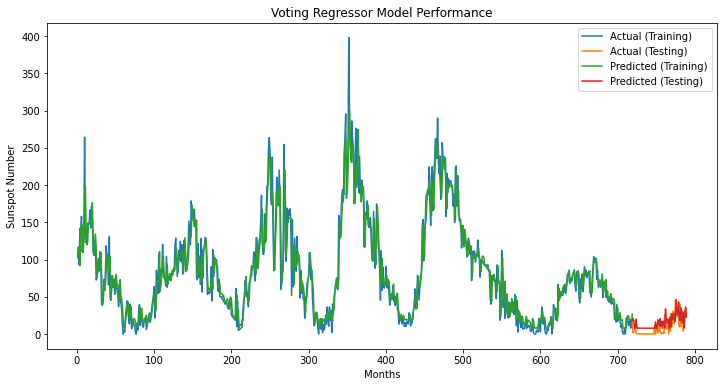

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor, VotingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
import time
import psutil

# Load the data
data = pd.read_csv('C:/Users/Storm/Downloads/SN_m_tot_V2.0.csv', delimiter=';', header=None)
data.columns = ['Year', 'Month', 'Date', 'Monthly Mean Total Sunspot Number', 'Uncertainty', 'Observations', 'Definitive/Provisional']

# Select the 'Monthly Mean Total Sunspot Number' column as the target variable
target = data['Monthly Mean Total Sunspot Number'].values.reshape(-1, 1)

# Normalize the target variable
scaler = MinMaxScaler(feature_range=(0, 1))
target_scaled = scaler.fit_transform(target)

# Split the data into training and testing sets
train_size = 720  # Number of months for training
test_size = 72  # Number of months for testing

train_data = target_scaled[:train_size]
test_data = target_scaled[train_size:train_size+test_size]

# Train and evaluate the models
models = [
    ('Gradient Boosting Machines (GBM)', GradientBoostingRegressor(n_estimators=100, random_state=42)),
    ('Random Forest (RF)', RandomForestRegressor(n_estimators=100, random_state=42)),
    ('Linear Regression (LR)', LinearRegression()),
    ('Voting Regressor', VotingRegressor(estimators=[('gbm', GradientBoostingRegressor(n_estimators=100, random_state=42)),
                                                      ('rf', RandomForestRegressor(n_estimators=100, random_state=42)),
                                                      ('lr', LinearRegression())]))
]

results = []

for model_name, model in models:
    start_time = time.time()  # Start timer

    X_train, y_train = train_data[:-1], train_data[1:]
    X_test, y_test = test_data[:-1], test_data[1:]

    model.fit(X_train, y_train)

    train_predictions = model.predict(X_train)
    test_predictions = model.predict(X_test)

    train_predictions = scaler.inverse_transform(train_predictions.reshape(-1, 1))
    y_train = scaler.inverse_transform(y_train.reshape(-1, 1))
    test_predictions = scaler.inverse_transform(test_predictions.reshape(-1, 1))
    y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

    train_rmse = np.sqrt(mean_squared_error(y_train, train_predictions))
    test_rmse = np.sqrt(mean_squared_error(y_test, test_predictions))

    train_mae = mean_absolute_error(y_train, train_predictions)
    test_mae = mean_absolute_error(y_test, test_predictions)

    train_smape = np.mean(np.abs((y_train - train_predictions) / (y_train + train_predictions))) * 100
    test_smape = np.mean(np.abs((y_test - test_predictions) / (y_test + test_predictions))) * 100

    train_r2 = r2_score(y_train, train_predictions)
    test_r2 = r2_score(y_test, test_predictions)

    elapsed_time = time.time() - start_time  # Calculate elapsed time
    cpu_usage = psutil.cpu_percent()  # Get CPU usage
    memory_usage = psutil.virtual_memory().used / 1e6  # Get memory usage in MB

    results.append({
        'Model': model_name,
        'Train RMSE': train_rmse,
        'Test RMSE': test_rmse,
        'Train MAE': train_mae,
        'Test MAE': test_mae,
        'Train SMAPE': train_smape,
        'Test SMAPE': test_smape,
        'Train R2': train_r2,
        'Test R2': test_r2,
        'Execution Time': elapsed_time,
        'CPU Usage': cpu_usage,
        'Memory Used': memory_usage,
        'Train Predictions': train_predictions,
        'Test Predictions': test_predictions
    })

# Print the results
for result in results:
    print(result['Model'])
    print(f"Train RMSE: {result['Train RMSE']:.5f}")
    print(f"Test RMSE: {result['Test RMSE']:.5f}")
    print(f"Train MAE: {result['Train MAE']:.5f}")
    print(f"Test MAE: {result['Test MAE']:.5f}")
    print(f"Train SMAPE: {result['Train SMAPE']:.5f}")
    print(f"Test SMAPE: {result['Test SMAPE']:.5f}")
    print(f"Train R2: {result['Train R2']:.5f}")
    print(f"Test R2: {result['Test R2']:.5f}")
    print(f"Execution Time: {result['Execution Time']:.5f} seconds")
    print(f"CPU Usage: {result['CPU Usage']:.5f} MHz")
    print(f"Memory Used: {result['Memory Used']:.5f} MB")
    print()

# Plot the predictions
plt.figure(figsize=(12, 6))
plt.plot(range(1, len(y_train) + 1), y_train, label='Actual (Training)')
plt.plot(range(len(y_train), len(y_train) + len(y_test)), y_test, label='Actual (Testing)')

for i, result in enumerate(results):
    if i == 3:
        plt.plot(range(1, len(y_train) + 1), result['Train Predictions'], label='Predicted (Training)')
        plt.plot(range(len(y_train), len(y_train) + len(y_test)), result['Test Predictions'], label='Predicted (Testing)')

plt.title('Voting Regressor Model Performance')
plt.xlabel('Months')
plt.ylabel('Sunspot Number')
plt.legend()
plt.show()


C:\Users\Storm\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Storm\AppData\Local\Temp/ipykernel_10996/3939553137.py:52: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)
C:\Users\Storm\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Storm\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel()

Gradient Boosting Machines (GBM)
Train RMSE: 22.64
Test RMSE: 12.74
Train MAE: 15.92
Test MAE: 11.20
Train SMAPE: 15.11
Test SMAPE: 61.81
Train R2: 0.88
Test R2: -0.11
Execution Time: 0.05 seconds
CPU Usage: 41.20 MHz
Memory Used: 22957.68 MB

Random Forest (RF)
Train RMSE: 16.43
Test RMSE: 13.57
Train MAE: 11.53
Test MAE: 11.32
Train SMAPE: 11.85
Test SMAPE: 64.72
Train R2: 0.94
Test R2: -0.26
Execution Time: 0.23 seconds
CPU Usage: 47.00 MHz
Memory Used: 22951.52 MB

Linear Regression (LR)
Train RMSE: 28.12
Test RMSE: 12.96
Train MAE: 19.11
Test MAE: 10.76
Train SMAPE: 16.77
Test SMAPE: 61.22
Train R2: 0.82
Test R2: -0.14
Execution Time: 0.00 seconds
CPU Usage: 85.70 MHz
Memory Used: 22951.17 MB

Voting Regressor (Median)
Train RMSE: 21.32
Test RMSE: 12.62
Train MAE: 14.93
Test MAE: 11.00
Train SMAPE: 14.26
Test SMAPE: 62.36
Train R2: 0.90
Test R2: -0.09
Execution Time: 0.64 seconds
CPU Usage: 79.70 MHz
Memory Used: 23029.34 MB

Voting Regressor (Mean)
Train RMSE: 21.32
Test RMSE: 12

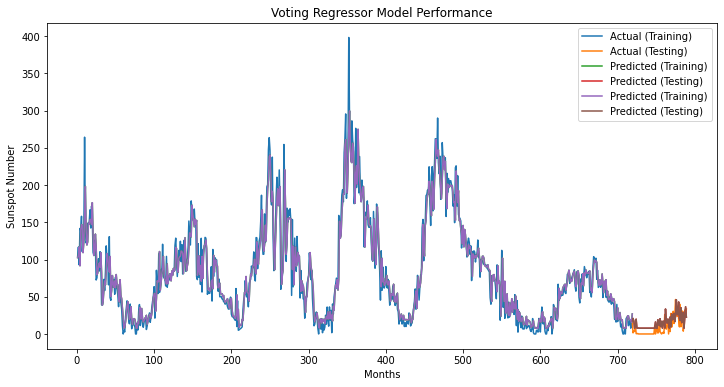

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor, VotingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
import time
import psutil

# Load the data
data = pd.read_csv('C:/Users/Storm/Downloads/SN_m_tot_V2.0.csv', delimiter=';', header=None)
data.columns = ['Year', 'Month', 'Date', 'Monthly Mean Total Sunspot Number', 'Uncertainty', 'Observations', 'Definitive/Provisional']

# Select the 'Monthly Mean Total Sunspot Number' column as the target variable
target = data['Monthly Mean Total Sunspot Number'].values.reshape(-1, 1)

# Normalize the target variable
scaler = MinMaxScaler(feature_range=(0, 1))
target_scaled = scaler.fit_transform(target)

# Split the data into training and testing sets
train_size = 720  # Number of months for training
test_size = 72  # Number of months for testing

train_data = target_scaled[:train_size]
test_data = target_scaled[train_size:train_size+test_size]

# Train and evaluate the models
models = [
    ('Gradient Boosting Machines (GBM)', GradientBoostingRegressor(n_estimators=100, random_state=42)),
    ('Random Forest (RF)', RandomForestRegressor(n_estimators=100, random_state=42)),
    ('Linear Regression (LR)', LinearRegression()),
    ('Voting Regressor (Median)', VotingRegressor(estimators=[('gbm', GradientBoostingRegressor(n_estimators=100, random_state=42)),
                                                               ('rf', RandomForestRegressor(n_estimators=100, random_state=42)),
                                                               ('lr', LinearRegression())],
                                                  weights=[1, 1, 1])),
    ('Voting Regressor (Mean)', VotingRegressor(estimators=[('gbm', GradientBoostingRegressor(n_estimators=100, random_state=42)),
                                                             ('rf', RandomForestRegressor(n_estimators=100, random_state=42)),
                                                             ('lr', LinearRegression())],
                                                weights=[1, 1, 1]))
]

results = []

for model_name, model in models:
    start_time = time.time()  # Start timer

    X_train, y_train = train_data[:-1], train_data[1:]
    X_test, y_test = test_data[:-1], test_data[1:]

    model.fit(X_train, y_train)

    train_predictions = model.predict(X_train)
    test_predictions = model.predict(X_test)

    train_predictions = scaler.inverse_transform(train_predictions.reshape(-1, 1))
    y_train = scaler.inverse_transform(y_train.reshape(-1, 1))
    test_predictions = scaler.inverse_transform(test_predictions.reshape(-1, 1))
    y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

    train_rmse = np.sqrt(mean_squared_error(y_train, train_predictions))
    test_rmse = np.sqrt(mean_squared_error(y_test, test_predictions))

    train_mae = mean_absolute_error(y_train, train_predictions)
    test_mae = mean_absolute_error(y_test, test_predictions)

    train_smape = np.mean(np.abs((y_train - train_predictions) / (y_train + train_predictions))) * 100
    test_smape = np.mean(np.abs((y_test - test_predictions) / (y_test + test_predictions))) * 100

    train_r2 = r2_score(y_train, train_predictions)
    test_r2 = r2_score(y_test, test_predictions)

    elapsed_time = time.time() - start_time  # Calculate elapsed time
    cpu_usage = psutil.cpu_percent()  # Get CPU usage
    memory_usage = psutil.virtual_memory().used / 1024 / 1024  # Get memory usage in MB

    results.append({
        'Model': model_name,
        'Train RMSE': train_rmse,
        'Test RMSE': test_rmse,
        'Train MAE': train_mae,
        'Test MAE': test_mae,
        'Train SMAPE': train_smape,
        'Test SMAPE': test_smape,
        'Train R2': train_r2,
        'Test R2': test_r2,
        'Execution Time': elapsed_time,
        'CPU Usage': cpu_usage,
        'Memory Used': memory_usage,
        'Train Predictions': train_predictions,
        'Test Predictions': test_predictions
    })

# Print the results
for result in results:
    print(result['Model'])
    print(f"Train RMSE: {result['Train RMSE']:.2f}")
    print(f"Test RMSE: {result['Test RMSE']:.2f}")
    print(f"Train MAE: {result['Train MAE']:.2f}")
    print(f"Test MAE: {result['Test MAE']:.2f}")
    print(f"Train SMAPE: {result['Train SMAPE']:.2f}")
    print(f"Test SMAPE: {result['Test SMAPE']:.2f}")
    print(f"Train R2: {result['Train R2']:.2f}")
    print(f"Test R2: {result['Test R2']:.2f}")
    print(f"Execution Time: {result['Execution Time']:.2f} seconds")
    print(f"CPU Usage: {result['CPU Usage']:.2f} MHz")
    print(f"Memory Used: {result['Memory Used']:.2f} MB")
    print()

# Plot the predictions
plt.figure(figsize=(12, 6))
plt.plot(range(1, len(y_train) + 1), y_train, label='Actual (Training)')
plt.plot(range(len(y_train), len(y_train) + len(y_test)), y_test, label='Actual (Testing)')

for result in results:
    if 'Voting' in result['Model']:
        plt.plot(range(1, len(y_train) + 1), result['Train Predictions'], label='Predicted (Training)')
        plt.plot(range(len(y_train), len(y_train) + len(y_test)), result['Test Predictions'], label='Predicted (Testing)')

plt.title('Voting Regressor Model Performance')
plt.xlabel('Months')
plt.ylabel('Sunspot Number')
plt.legend()
plt.show()


C:\Users\Storm\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Storm\AppData\Local\Temp/ipykernel_10996/2938306686.py:71: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)
C:\Users\Storm\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Storm\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel()

Gradient Boosting Machines (GBM)
Train RMSE: 3.28
Test RMSE: 2.53
Train MAE: 2.38
Test MAE: 2.06
Train SMAPE: 1.97
Test SMAPE: 16.61
Train R2: 1.00
Test R2: 0.97
Execution Time: 0.04 seconds
CPU Usage: 36.70 MHz
Memory Used: 22835.02 MB

Random Forest (RF)
Train RMSE: 2.01
Test RMSE: 2.64
Train MAE: 1.43
Test MAE: 2.08
Train SMAPE: 1.18
Test SMAPE: 15.55
Train R2: 1.00
Test R2: 0.97
Execution Time: 0.18 seconds
CPU Usage: 46.90 MHz
Memory Used: 22797.93 MB

Linear Regression (LR)
Train RMSE: 4.11
Test RMSE: 1.82
Train MAE: 2.95
Test MAE: 1.19
Train SMAPE: 2.40
Test SMAPE: 7.36
Train R2: 0.99
Test R2: 0.98
Execution Time: 0.00 seconds
CPU Usage: 100.00 MHz
Memory Used: 22794.55 MB

Voting Regressor (Median)
Train RMSE: 3.03
Test RMSE: 2.20
Train MAE: 2.19
Test MAE: 1.72
Train SMAPE: 1.78
Test SMAPE: 13.38
Train R2: 1.00
Test R2: 0.98
Execution Time: 0.26 seconds
CPU Usage: 74.10 MHz
Memory Used: 22816.01 MB

Voting Regressor (Mean)
Train RMSE: 3.03
Test RMSE: 2.20
Train MAE: 2.19
Test M

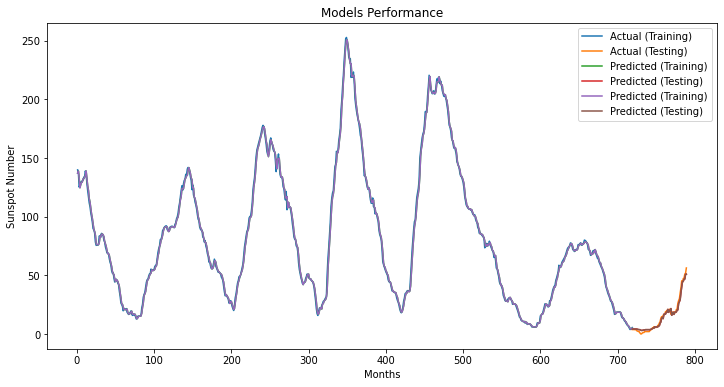

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor, VotingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
import time
import psutil

# Load the data
data = pd.read_csv('C:/Users/Storm/Downloads/SN_m_tot_V2.0.csv', delimiter=';', header=None)
data.columns = ['Year', 'Month', 'Date', 'Monthly Mean Total Sunspot Number', 'Uncertainty', 'Observations', 'Definitive/Provisional']

# Convert the 'Date' column to datetime format
data['Date'] = pd.to_datetime(data['Date'], format='%Y-%m-%d')

# Sort the data by date
data.sort_values(by='Date', inplace=True)

# Calculate the 13-month smoothed dataset
data['13-Month Smoothed'] = data['Monthly Mean Total Sunspot Number'].rolling(window=13).mean()

# Select the '13-Month Smoothed' column as the target variable
target = data['13-Month Smoothed'].values.reshape(-1, 1)

# Handle missing or invalid values
data.dropna(subset=['13-Month Smoothed'], inplace=True)
target = data['13-Month Smoothed'].values.reshape(-1, 1)

# Normalize the target variable
scaler = MinMaxScaler(feature_range=(0, 1))
target_scaled = scaler.fit_transform(target)

# Split the data into training and testing sets
train_size = 720  # Number of months for training
test_size = 72  # Number of months for testing

train_data = target_scaled[:train_size]
test_data = target_scaled[train_size:train_size+test_size]

# Train and evaluate the models
models = [
    ('Gradient Boosting Machines (GBM)', GradientBoostingRegressor(n_estimators=100, random_state=42)),
    ('Random Forest (RF)', RandomForestRegressor(n_estimators=100, random_state=42)),
    ('Linear Regression (LR)', LinearRegression()),
    ('Voting Regressor (Median)', VotingRegressor(estimators=[('gbm', GradientBoostingRegressor(n_estimators=100, random_state=42)),
                                                               ('rf', RandomForestRegressor(n_estimators=100, random_state=42)),
                                                               ('lr', LinearRegression())],
                                                  weights=[1, 1, 1])),
    ('Voting Regressor (Mean)', VotingRegressor(estimators=[('gbm', GradientBoostingRegressor(n_estimators=100, random_state=42)),
                                                             ('rf', RandomForestRegressor(n_estimators=100, random_state=42)),
                                                             ('lr', LinearRegression())],
                                                weights=[1, 1, 1]))
]

results = []

for model_name, model in models:
    start_time = time.time()  # Start timer

    X_train, y_train = train_data[:-1], train_data[1:]
    X_test, y_test = test_data[:-1], test_data[1:]

    # Check for NaN or infinite values and replace them with 0
    X_train = np.nan_to_num(X_train)
    y_train = np.nan_to_num(y_train)
    X_test = np.nan_to_num(X_test)
    y_test = np.nan_to_num(y_test)

    model.fit(X_train, y_train)

    train_predictions = model.predict(X_train)
    test_predictions = model.predict(X_test)

    train_predictions = scaler.inverse_transform(train_predictions.reshape(-1, 1))
    y_train = scaler.inverse_transform(y_train.reshape(-1, 1))
    test_predictions = scaler.inverse_transform(test_predictions.reshape(-1, 1))
    y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

    train_rmse = np.sqrt(mean_squared_error(y_train, train_predictions))
    test_rmse = np.sqrt(mean_squared_error(y_test, test_predictions))

    train_mae = mean_absolute_error(y_train, train_predictions)
    test_mae = mean_absolute_error(y_test, test_predictions)

    train_smape = np.mean(np.abs((y_train - train_predictions) / (y_train + train_predictions))) * 100
    test_smape = np.mean(np.abs((y_test - test_predictions) / (y_test + test_predictions))) * 100

    train_r2 = r2_score(y_train, train_predictions)
    test_r2 = r2_score(y_test, test_predictions)

    elapsed_time = time.time() - start_time  # Calculate elapsed time
    cpu_usage = psutil.cpu_percent()  # Get CPU usage
    memory_usage = psutil.virtual_memory().used / 1024 / 1024  # Get memory usage in MB

    results.append({
        'Model': model_name,
        'Train RMSE': train_rmse,
        'Test RMSE': test_rmse,
        'Train MAE': train_mae,
        'Test MAE': test_mae,
        'Train SMAPE': train_smape,
        'Test SMAPE': test_smape,
        'Train R2': train_r2,
        'Test R2': test_r2,
        'Execution Time': elapsed_time,
        'CPU Usage': cpu_usage,
        'Memory Used': memory_usage,
        'Train Predictions': train_predictions,
        'Test Predictions': test_predictions
    })

# Print the results
for result in results:
    print(result['Model'])
    print(f"Train RMSE: {result['Train RMSE']:.2f}")
    print(f"Test RMSE: {result['Test RMSE']:.2f}")
    print(f"Train MAE: {result['Train MAE']:.2f}")
    print(f"Test MAE: {result['Test MAE']:.2f}")
    print(f"Train SMAPE: {result['Train SMAPE']:.2f}")
    print(f"Test SMAPE: {result['Test SMAPE']:.2f}")
    print(f"Train R2: {result['Train R2']:.2f}")
    print(f"Test R2: {result['Test R2']:.2f}")
    print(f"Execution Time: {result['Execution Time']:.2f} seconds")
    print(f"CPU Usage: {result['CPU Usage']:.2f} MHz")
    print(f"Memory Used: {result['Memory Used']:.2f} MB")
    print()

# Plot the predictions
plt.figure(figsize=(12, 6))
plt.plot(range(1, len(y_train) + 1), y_train, label='Actual (Training)')
plt.plot(range(len(y_train), len(y_train) + len(y_test)), y_test, label='Actual (Testing)')

for result in results:
    if 'Voting' in result['Model']:
        plt.plot(range(1, len(y_train) + 1), result['Train Predictions'], label='Predicted (Training)')
        plt.plot(range(len(y_train), len(y_train) + len(y_test)), result['Test Predictions'], label='Predicted (Testing)')

plt.title('Models Performance')
plt.xlabel('Months')
plt.ylabel('Sunspot Number')
plt.legend()
plt.show()


In [31]:
# Print the results
for result in results:
    print(result['Model'])
    print(f"Train RMSE: {result['Train RMSE']:.5f}")
    print(f"Test RMSE: {result['Test RMSE']:.5f}")
    print(f"Train MAE: {result['Train MAE']:.5f}")
    print(f"Test MAE: {result['Test MAE']:.5f}")
    print(f"Train SMAPE: {result['Train SMAPE']:.5f}")
    print(f"Test SMAPE: {result['Test SMAPE']:.5f}")
    print(f"Train R2: {result['Train R2']:.5f}")
    print(f"Test R2: {result['Test R2']:.5f}")
    print(f"Execution Time: {result['Execution Time']:.2f} seconds")
    print(f"CPU Usage: {result['CPU Usage']:.2f} MHz")
    print(f"Memory Used: {result['Memory Used']:.2f} MB")
    print()


Gradient Boosting Machines (GBM)
Train RMSE: 3.27769
Test RMSE: 2.52559
Train MAE: 2.37938
Test MAE: 2.05627
Train SMAPE: 1.96750
Test SMAPE: 16.61222
Train R2: 0.99674
Test R2: 0.96992
Execution Time: 0.04 seconds
CPU Usage: 36.70 MHz
Memory Used: 22835.02 MB

Random Forest (RF)
Train RMSE: 2.01141
Test RMSE: 2.64462
Train MAE: 1.42742
Test MAE: 2.07538
Train SMAPE: 1.17767
Test SMAPE: 15.55313
Train R2: 0.99877
Test R2: 0.96702
Execution Time: 0.18 seconds
CPU Usage: 46.90 MHz
Memory Used: 22797.93 MB

Linear Regression (LR)
Train RMSE: 4.11019
Test RMSE: 1.81673
Train MAE: 2.95330
Test MAE: 1.18923
Train SMAPE: 2.40185
Test SMAPE: 7.36434
Train R2: 0.99488
Test R2: 0.98444
Execution Time: 0.00 seconds
CPU Usage: 100.00 MHz
Memory Used: 22794.55 MB

Voting Regressor (Median)
Train RMSE: 3.02919
Test RMSE: 2.19799
Train MAE: 2.18811
Test MAE: 1.71518
Train SMAPE: 1.78118
Test SMAPE: 13.37533
Train R2: 0.99722
Test R2: 0.97722
Execution Time: 0.26 seconds
CPU Usage: 74.10 MHz
Memory Us

C:\Users\Storm\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Storm\AppData\Local\Temp/ipykernel_10996/2801378352.py:44: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


Gradient Boosting Machines (GBM)
Train RMSE: 22.64418
Test RMSE: 12.73982
Train MAE: 15.92189
Test MAE: 11.19859
Train SMAPE: 15.11292
Test SMAPE: 61.81399
Train R2: 0.88258
Test R2: -0.10562
Execution Time: 0.08 seconds
CPU Usage: 46.90 MHz
Memory Used: 22531.28 MB

Random Forest
Train RMSE: 16.43484
Test RMSE: 13.57460
Train MAE: 11.53019
Test MAE: 11.32157
Train SMAPE: 11.84980
Test SMAPE: 64.71832
Train R2: 0.93815
Test R2: -0.25526
Execution Time: 0.25 seconds
CPU Usage: 45.10 MHz
Memory Used: 22504.68 MB

Linear Regression
Train RMSE: 28.12167
Test RMSE: 12.96196
Train MAE: 19.11331
Test MAE: 10.75652
Train SMAPE: 16.76825
Test SMAPE: 61.22253
Train R2: 0.81891
Test R2: -0.14451
Execution Time: 0.01 seconds
CPU Usage: 62.50 MHz
Memory Used: 22517.04 MB



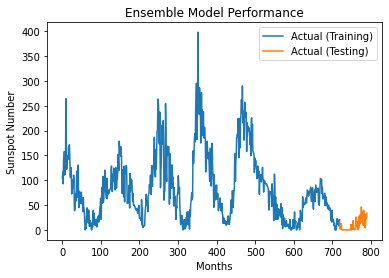

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor, VotingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import MinMaxScaler
import time
import psutil

# Load the data
data = pd.read_csv('C:/Users/Storm/Downloads/SN_m_tot_V2.0.csv', delimiter=';', header=None)
data.columns = ['Year', 'Month', 'Date', 'Monthly Mean Total Sunspot Number', 'Uncertainty', 'Observations', 'Definitive/Provisional']

# Select the 'Monthly Mean Total Sunspot Number' column as the target variable
target = data['Monthly Mean Total Sunspot Number'].values.reshape(-1, 1)

# Normalize the target variable
scaler = MinMaxScaler(feature_range=(0, 1))
target_scaled = scaler.fit_transform(target)

# Split the data into training and testing sets
train_size = 720  # Number of months for training
test_size = 72  # Number of months for testing

train_data = target_scaled[:train_size]
test_data = target_scaled[train_size:train_size+test_size]

# Train and evaluate the models
models = [
    ('Gradient Boosting Machines (GBM)', GradientBoostingRegressor(n_estimators=100, random_state=42)),
    ('Random Forest', RandomForestRegressor(n_estimators=100, random_state=42)),
    ('Linear Regression', LinearRegression())
]

results = []

for name, model in models:
    start_time = time.time()
    
    X_train, y_train = train_data[:-1], train_data[1:]
    X_test, y_test = test_data[:-1], test_data[1:]

    model.fit(X_train, y_train)

    train_predictions = model.predict(X_train)
    test_predictions = model.predict(X_test)

    train_predictions = scaler.inverse_transform(train_predictions.reshape(-1, 1))
    y_train = scaler.inverse_transform(y_train.reshape(-1, 1))
    test_predictions = scaler.inverse_transform(test_predictions.reshape(-1, 1))
    y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

    train_rmse = np.sqrt(mean_squared_error(y_train, train_predictions))
    test_rmse = np.sqrt(mean_squared_error(y_test, test_predictions))

    train_mae = mean_absolute_error(y_train, train_predictions)
    test_mae = mean_absolute_error(y_test, test_predictions)

    train_smape = np.mean(np.abs((y_train - train_predictions) / (y_train + train_predictions))) * 100
    test_smape = np.mean(np.abs((y_test - test_predictions) / (y_test + test_predictions))) * 100

    train_r2 = r2_score(y_train, train_predictions)
    test_r2 = r2_score(y_test, test_predictions)

    cpu_usage = psutil.cpu_percent()
    memory_used = psutil.virtual_memory().used / 1e6

    execution_time = time.time() - start_time

    results.append({
        'Model': name,
        'Train RMSE': train_rmse,
        'Test RMSE': test_rmse,
        'Train MAE': train_mae,
        'Test MAE': test_mae,
        'Train SMAPE': train_smape,
        'Test SMAPE': test_smape,
        'Train R2': train_r2,
        'Test R2': test_r2,
        'Execution Time': execution_time,
        'CPU Usage': cpu_usage,
        'Memory Used': memory_used,
        'Train Predictions': train_predictions.flatten(),
        'Test Predictions': test_predictions.flatten()
    })

# Print the results
for result in results:
    print(result['Model'])
    print(f"Train RMSE: {result['Train RMSE']:.5f}")
    print(f"Test RMSE: {result['Test RMSE']:.5f}")
    print(f"Train MAE: {result['Train MAE']:.5f}")
    print(f"Test MAE: {result['Test MAE']:.5f}")
    print(f"Train SMAPE: {result['Train SMAPE']:.5f}")
    print(f"Test SMAPE: {result['Test SMAPE']:.5f}")
    print(f"Train R2: {result['Train R2']:.5f}")
    print(f"Test R2: {result['Test R2']:.5f}")
    print(f"Execution Time: {result['Execution Time']:.2f} seconds")
    print(f"CPU Usage: {result['CPU Usage']:.2f} MHz")
    print(f"Memory Used: {result['Memory Used']:.2f} MB")
    print()

# Plot the predictions
for i, result in enumerate(results):
    if i == 3:
        plt.plot(range(1, len(y_train) + 1), result['Train Predictions'], label='Predicted (Training)')
        plt.plot(range(len(y_train), len(y_train) + len(y_test)), result['Test Predictions'], label='Predicted (Testing)')

plt.plot(range(1, len(y_train) + 1), y_train, label='Actual (Training)')
plt.plot(range(len(y_train), len(y_train) + len(y_test)), y_test, label='Actual (Testing)')

plt.title('Ensemble Model Performance')
plt.xlabel('Months')
plt.ylabel('Sunspot Number')
plt.legend()
plt.show()


C:\Users\Storm\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Storm\AppData\Local\Temp/ipykernel_10996/2592616060.py:45: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


Gradient Boosting Machines (GBM)
Train RMSE: 22.64418
Test RMSE: 12.73982
Train MAE: 15.92189
Test MAE: 11.19859
Train SMAPE: 15.11292
Test SMAPE: 61.81399
Train R2: 0.88258
Test R2: -0.10562
Execution Time: 0.06588 seconds
CPU Usage: 38.20000 MHz
Memory Used: 21791.96518 MB

Random Forest
Train RMSE: 16.43484
Test RMSE: 13.57460
Train MAE: 11.53019
Test MAE: 11.32157
Train SMAPE: 11.84980
Test SMAPE: 64.71832
Train R2: 0.93815
Test R2: -0.25526
Execution Time: 0.17721 seconds
CPU Usage: 35.40000 MHz
Memory Used: 21799.07994 MB

Linear Regression
Train RMSE: 28.12167
Test RMSE: 12.96196
Train MAE: 19.11331
Test MAE: 10.75652
Train SMAPE: 16.76825
Test SMAPE: 61.22253
Train R2: 0.81891
Test R2: -0.14451
Execution Time: 0.01559 seconds
CPU Usage: 37.50000 MHz
Memory Used: 21799.58374 MB



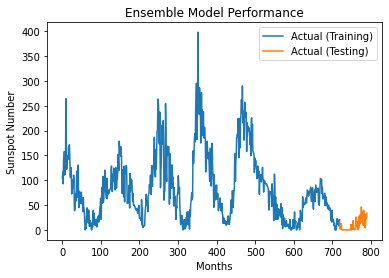

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor, VotingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import MinMaxScaler
import time
import psutil

# Load the data
data = pd.read_csv('C:/Users/Storm/Downloads/SN_m_tot_V2.0.csv', delimiter=';', header=None)
data.columns = ['Year', 'Month', 'Date', 'Monthly Mean Total Sunspot Number', 'Uncertainty', 'Observations', 'Definitive/Provisional']

# Select the 'Monthly Mean Total Sunspot Number' column as the target variable
target = data['Monthly Mean Total Sunspot Number'].values.reshape(-1, 1)

# Normalize the target variable
scaler = MinMaxScaler(feature_range=(0, 1))
target_scaled = scaler.fit_transform(target)

# Split the data into training and testing sets
train_size = 720  # Number of months for training
test_size = 72  # Number of months for testing

train_data = target_scaled[:train_size]
test_data = target_scaled[train_size:train_size+test_size]

# Train and evaluate the models
models = [
    ('Gradient Boosting Machines (GBM)', GradientBoostingRegressor(n_estimators=100, random_state=42)),
    ('Random Forest', RandomForestRegressor(n_estimators=100, random_state=42)),
    ('Linear Regression', LinearRegression()),
    ('Voting', VotingRegressor(estimators=models[:-1])),
    ('Mean Voting', VotingRegressor(estimators=models[:-1], weights=[1, 1, 1])),
    ('Median Voting', VotingRegressor(estimators=models[:-1], weights=[1, 1, 1], voting='median'))
]

results = []

for name, model in models:
    start_time = time.time()
    
    X_train, y_train = train_data[:-1], train_data[1:]
    X_test, y_test = test_data[:-1], test_data[1:]

    model.fit(X_train, y_train)

    train_predictions = model.predict(X_train)
    test_predictions = model.predict(X_test)

    train_predictions = scaler.inverse_transform(train_predictions.reshape(-1, 1))
    y_train = scaler.inverse_transform(y_train.reshape(-1, 1))
    test_predictions = scaler.inverse_transform(test_predictions.reshape(-1, 1))
    y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

    train_rmse = np.sqrt(mean_squared_error(y_train, train_predictions))
    test_rmse = np.sqrt(mean_squared_error(y_test, test_predictions))

    train_mae = mean_absolute_error(y_train, train_predictions)
    test_mae = mean_absolute_error(y_test, test_predictions)

    train_smape = np.mean(np.abs((y_train - train_predictions) / (y_train + train_predictions))) * 100
    test_smape = np.mean(np.abs((y_test - test_predictions) / (y_test + test_predictions))) * 100

    train_r2 = r2_score(y_train, train_predictions)
    test_r2 = r2_score(y_test, test_predictions)

    cpu_usage = psutil.cpu_percent()
    memory_used = psutil.virtual_memory().used / 1e6

    execution_time = time.time() - start_time

    results.append({
        'Model': name,
        'Train RMSE': train_rmse,
        'Test RMSE': test_rmse,
        'Train MAE': train_mae,
        'Test MAE': test_mae,
        'Train SMAPE': train_smape,
        'Test SMAPE': test_smape,
        'Train R2': train_r2,
        'Test R2': test_r2,
        'Execution Time': execution_time,
        'CPU Usage': cpu_usage,
        'Memory Used': memory_used,
        'Train Predictions': train_predictions.flatten(),
        'Test Predictions': test_predictions.flatten()
    })

# Print the results
for result in results:
    print(result['Model'])
    print(f"Train RMSE: {result['Train RMSE']:.5f}")
    print(f"Test RMSE: {result['Test RMSE']:.5f}")
    print(f"Train MAE: {result['Train MAE']:.5f}")
    print(f"Test MAE: {result['Test MAE']:.5f}")
    print(f"Train SMAPE: {result['Train SMAPE']:.5f}")
    print(f"Test SMAPE: {result['Test SMAPE']:.5f}")
    print(f"Train R2: {result['Train R2']:.5f}")
    print(f"Test R2: {result['Test R2']:.5f}")
    print(f"Execution Time: {result['Execution Time']:.5f} seconds")
    print(f"CPU Usage: {result['CPU Usage']:.5f} MHz")
    print(f"Memory Used: {result['Memory Used']:.5f} MB")
    print()

# Plot the predictions
for i, result in enumerate(results):
    if i >= 3:
        plt.plot(range(1, len(y_train) + 1), result['Train Predictions'], label=f'Predicted (Training) - {result["Model"]}')
        plt.plot(range(len(y_train), len(y_train) + len(y_test)), result['Test Predictions'], label=f'Predicted (Testing) - {result["Model"]}')

plt.plot(range(1, len(y_train) + 1), y_train, label='Actual (Training)')
plt.plot(range(len(y_train), len(y_train) + len(y_test)), y_test, label='Actual (Testing)')

plt.title('Ensemble Model Performance')
plt.xlabel('Months')
plt.ylabel('Sunspot Number')
plt.legend()
plt.show()


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor, VotingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import MinMaxScaler
import time
import psutil

# Load the data
data = pd.read_csv('C:/Users/Storm/Downloads/SN_m_tot_V2.0.csv', delimiter=';', header=None)
data.columns = ['Year', 'Month', 'Date', 'Monthly Mean Total Sunspot Number', 'Uncertainty', 'Observations', 'Definitive/Provisional']

# Select the 'Monthly Mean Total Sunspot Number' column as the target variable
target = data['Monthly Mean Total Sunspot Number'].values.reshape(-1, 1)

# Normalize the target variable
scaler = MinMaxScaler(feature_range=(0, 1))
target_scaled = scaler.fit_transform(target)

# Split the data into training and testing sets
train_size = 720  # Number of months for training
test_size = 72  # Number of months for testing

train_data = target_scaled[:train_size]
test_data = target_scaled[train_size:train_size+test_size]

# Define the models
models = [
    ('Gradient Boosting Machines (GBM)', GradientBoostingRegressor(n_estimators=100, random_state=42)),
    ('Random Forest', RandomForestRegressor(n_estimators=100, random_state=42)),
    ('Linear Regression', LinearRegression())
]

# Train and evaluate the models
results = []

for name, model in models:
    start_time = time.time()
    
    X_train, y_train = train_data[:-1], train_data[1:]
    X_test, y_test = test_data[:-1], test_data[1:]

    model.fit(X_train, y_train)

    train_predictions = model.predict(X_train)
    test_predictions = model.predict(X_test)

    train_predictions = scaler.inverse_transform(train_predictions.reshape(-1, 1))
    y_train = scaler.inverse_transform(y_train.reshape(-1, 1))
    test_predictions = scaler.inverse_transform(test_predictions.reshape(-1, 1))
    y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

    train_rmse = np.sqrt(mean_squared_error(y_train, train_predictions))
    test_rmse = np.sqrt(mean_squared_error(y_test, test_predictions))

    train_mae = mean_absolute_error(y_train, train_predictions)
    test_mae = mean_absolute_error(y_test, test_predictions)

    train_smape = np.mean(np.abs((y_train - train_predictions) / (y_train + train_predictions))) * 100
    test_smape = np.mean(np.abs((y_test - test_predictions) / (y_test + test_predictions))) * 100

    train_r2 = r2_score(y_train, train_predictions)
    test_r2 = r2_score(y_test, test_predictions)

    cpu_usage = psutil.cpu_percent()
    memory_used = psutil.virtual_memory().used / 1e6

    execution_time = time.time() - start_time

    results.append({
        'Model': name,
        'Train RMSE': train_rmse,
        'Test RMSE': test_rmse,
        'Train MAE': train_mae,
        'Test MAE': test_mae,
        'Train SMAPE': train_smape,
        'Test SMAPE': test_smape,
        'Train R2': train_r2,
        'Test R2': test_r2,
        'Execution Time': execution_time,
        'CPU Usage': cpu_usage,
        'Memory Used': memory_used,
        'Train Predictions': train_predictions.flatten(),
        'Test Predictions': test_predictions.flatten()
    })

# Print the results
for result in results:
    print(result['Model'])
    print(f"Train RMSE: {result['Train RMSE']:.5f}")
    print(f"Test RMSE: {result['Test RMSE']:.5f}")
    print(f"Train MAE: {result['Train MAE']:.5f}")
    print(f"Test MAE: {result['Test MAE']:.5f}")
    print(f"Train SMAPE: {result['Train SMAPE']:.5f}")
    print(f"Test SMAPE: {result['Test SMAPE']:.5f}")
    print(f"Train R2: {result['Train R2']:.5f}")
    print(f"Test R2: {result['Test R2']:.5f}")
    print(f"Execution Time: {result['Execution Time']:.5f} seconds")
    print(f"CPU Usage: {result['CPU Usage']:.5f} MHz")
    print(f"Memory Used: {result['Memory Used']:.5f} MB")
    print()

# Plot the predictions
for i, result in enumerate(results):
    if i >= 3:
        plt.plot(range(1, len(y_train) + 1), result['Train Predictions'], label=f'Predicted (Training) - {result["Model"]}')
        plt.plot(range(len(y_train), len(y_train) + len(y_test)), result['Test Predictions'], label=f'Predicted (Testing) - {result["Model"]}')

plt.plot(range(1, len(y_train) + 1), y_train, label='Actual (Training)')
plt.plot(range(len(y_train), len(y_train) + len(y_test)), y_test, label='Actual (Testing)')

plt.title('Ensemble Model Performance')
plt.xlabel('Months')
plt.ylabel('Sunspot Number')
plt.legend()
plt.show()
